In [ ]:
# Instalar DiCE
!pip install dice-ml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 40.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 1.5.3 which is incompatible.
xarray 2024.6.0 requires pandas>=2.0, but you have pandas 1.5.3 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
# Cargar el archivo CSV en un DataFrame
dataset = pd.read_csv('/content/drive/MyDrive/TFM_CRC_MICROBIOME.csv')

print(dataset.head())

   Unnamed: 0  \
0           0   
1           1   
2           2   
3           3   
4           4   

   d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Bacteroidaceae;g__Bacteroides_H  \
0                                           0.637630                                                
1                                           0.237705                                                
2                                           0.038784                                                
3                                           0.004594                                                
4                                           0.025618                                                

   d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales_A_737866;f__Enterobacteriaceae_A;g__Klebsiella_724518  \
0                                           0.307338                                                                                
1                       

In [ ]:
# Crear una lista de columnas a eliminar
columnas_a_eliminar = []

# Procesar cada columna excepto la primera y las dos últimas
for columna in dataset.columns[1:-2]:
    # Separar la columna por punto y coma
    separados = columna.split(';')

    # Verificar si se obtienen exactamente 6 nombres
    if len(separados) == 6:
        # Renombrar la columna con el último de los nombres
        nuevo_nombre = separados[-1]
        dataset = dataset.rename(columns={columna: nuevo_nombre})
    else:
        # Agregar a la lista de columnas a eliminar
        columnas_a_eliminar.append(columna)

# Eliminar las columnas que no cumplen con la condición
dataset = dataset.drop(columns=columnas_a_eliminar)

# Mostrar el dataframe procesado
print(dataset)

      Unnamed: 0  g__Bacteroides_H  g__Klebsiella_724518  g__Parvimonas  \
0              0          0.637630              0.307338       0.027949   
1              1          0.237705              0.000000       0.044057   
2              2          0.038784              0.000000       0.003641   
3              3          0.004594              0.000000       0.000000   
4              4          0.025618              0.000000       0.032154   
...          ...               ...                   ...            ...   
2843        2843          0.101386              0.000000       0.000000   
2844        2844          0.072412              0.000000       0.000000   
2845        2845          0.255244              0.000000       0.000243   
2846        2846          0.242867              0.000000       0.000000   
2847        2847          0.200762              0.000000       0.000000   

      g__Fusobacterium_C  g__Pygmaiobacter  g__Erysipelatoclostridium  \
0               0.017960  

In [ ]:
# Obtener los IDs únicos de la columna PRJA
unique_ids = dataset['PRJA'].unique()

# Dividir los IDs en train (80%) y test (20%)
train_ids, test_ids = train_test_split(unique_ids, test_size=0.2, random_state=0)

# Crear los dataframes de train y test basados en los IDs seleccionados
train_df = dataset[dataset['PRJA'].isin(train_ids)]
test_df = dataset[dataset['PRJA'].isin(test_ids)]

# Mostrar el tamaño de los conjuntos resultantes
print(f"Tamaño del conjunto de entrenamiento: {train_df.shape}")
print(f"Tamaño del conjunto de prueba: {test_df.shape}")

# Separar características (X) y etiquetas (y)
X_train = train_df.iloc[:, 1:-2]  # Todas las columnas excepto la primera, la penúltima y la última
y_train = train_df.iloc[:, -2]    # La penúltima columna es 'Label'
X_test = test_df.iloc[:, 1:-2]
y_test = test_df.iloc[:, -2]

Tamaño del conjunto de entrenamiento: (2632, 1255)
Tamaño del conjunto de prueba: (216, 1255)


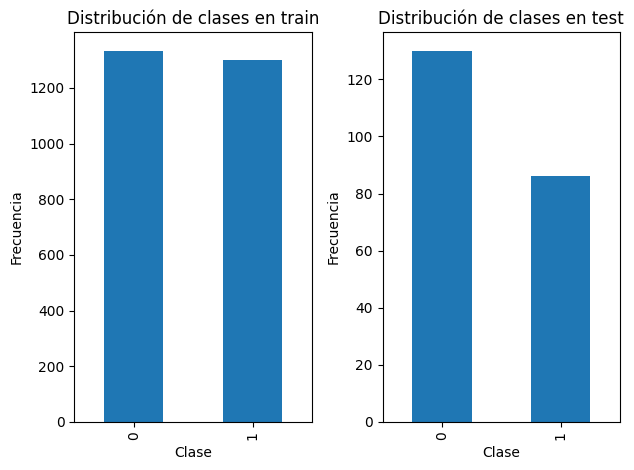

In [ ]:
# Histograma del conjunto de entrenamiento
plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind='bar')
plt.title('Distribución de clases en train')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')

# Histograma del conjunto de prueba
plt.subplot(1, 2, 2)
y_test.value_counts().plot(kind='bar')
plt.title('Distribución de clases en test')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import joblib
import numpy as np

# Cargar el modelo desde Google Drive
best_model = joblib.load('/content/drive/My Drive/modelos/mejor_modelo.pkl')

# Cargar las columnas seleccionadas desde Google Drive
selected_columns = np.load('/content/drive/My Drive/modelos/columnas_seleccionadas.npy', allow_pickle=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Evaluar el mejor modelo en el conjunto de prueba
X_test_final = X_test[selected_columns]  # Asegurarse de usar las mismas columnas seleccionadas
y_pred_best = best_model.predict(X_test_final)
y_pred_proba_best = best_model.predict_proba(X_test_final)[:, 1]

accuracy_best = accuracy_score(y_test, y_pred_best)
auc_best = roc_auc_score(y_test, y_pred_proba_best)
report_best = classification_report(y_test, y_pred_best)

print(f"Mejor modelo - Accuracy: {accuracy_best}, AUC: {auc_best}")
print("Ensemble de Modelos con SMOTE y Selección de Características")
print(f"Classification Report:\n{report_best}")

Mejor modelo - Accuracy: 0.7962962962962963, AUC: 0.8203935599284438
Ensemble de Modelos con SMOTE y Selección de Características
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       130
           1       0.76      0.71      0.73        86

    accuracy                           0.80       216
   macro avg       0.79      0.78      0.78       216
weighted avg       0.79      0.80      0.79       216



In [ ]:
import pandas as pd
import numpy as np
import random

# Configurar semilla para reproducibilidad
seed = 0
random.seed(seed)
np.random.seed(seed)

# Convertir los datos de entrenamiento a DataFrame para usar con DiCE
X_train_final = X_train[selected_columns]
X_test_final = X_test[selected_columns]

# Seleccionar todas las instancias con etiqueta 0
query_instances = X_test_final[y_test == 0]

if query_instances.empty:
    print("No se encontraron instancias con etiqueta 0 en X_test_final.")
else:
    print(f"Se encontraron {len(query_instances)} instancias con etiqueta 0.")

    # Definir los límites mínimo y máximo permitidos
    min_values = X_train_final.min()
    max_values = X_train_final.max()

    # Filtrar las instancias que tienen todas las características dentro del rango permitido
    within_range_instances = query_instances[(query_instances >= min_values) & (query_instances <= max_values)].dropna()

    if within_range_instances.empty:
        print("No se encontraron instancias con todas las características dentro del rango permitido.")
    else:
        print(f"Se encontraron {len(within_range_instances)} instancias con todas las características dentro del rango permitido.")

        # Seleccionar aleatoriamente 10 instancias con semilla 0
        selected_instances = within_range_instances.sample(n=10, random_state=seed)

        # Tomar la primera instancia de las seleccionadas y llamarla query_instance
        query_instance = selected_instances.iloc[0:1]

        print(f"Se ha seleccionado la siguiente instancia (query_instance) con todas las características dentro del rango permitido y con Label = 0:")
        print(query_instance)

Se encontraron 130 instancias con etiqueta 0.
Se encontraron 71 instancias con todas las características dentro del rango permitido.
Se ha seleccionado la siguiente instancia (query_instance) con todas las características dentro del rango permitido y con Label = 0:
      g__Bacteroides_H  g__Klebsiella_724518  g__Parvimonas  \
1145          0.000064                   0.0       0.000032   

      g__Fusobacterium_C  g__Pygmaiobacter  g__Erysipelatoclostridium  \
1145                 0.0               0.0                     0.0009   

      g__Bulleidia  g__Enterococcus_H_360604  g__Holdemanella  \
1145           0.0                       0.0              0.0   

      g__Mediterraneibacter_A_155507  ...  g__UBA2730  g__OLB17_426821  \
1145                        0.000889  ...         0.0              0.0   

      g__Gleimia  g__Pseudoglutamicibacter  g__Gallalistipes  g__UBA4951  \
1145         0.0                       0.0               0.0         0.0   

      g__VUNI01  g__Helicob

# **1**

In [ ]:
# Importar las bibliotecas necesarias
import dice_ml
from dice_ml import Dice
from dice_ml.utils import helpers
import pandas as pd
import numpy as np
import random
import tensorflow as tf

# Configurar semilla para reproducibilidad
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Convertir los datos de entrenamiento a DataFrame para usar con DiCE
X_train_final = X_train[selected_columns]
X_test_final = X_test[selected_columns]

# Crear un DataFrame de características
X_train_df = pd.DataFrame(X_train_final, columns=selected_columns)
y_train_df = pd.DataFrame(y_train.values, columns=['Label'])

# Asegurarse de que los índices de X_train_df y y_train_df estén alineados
X_train_df = X_train_df.reset_index(drop=True)
y_train_df = y_train_df.reset_index(drop=True)

# Concatenar características y etiquetas en un solo DataFrame
train_df_dice = pd.concat([X_train_df, y_train_df], axis=1)

# Verificar si hay valores faltantes después de la concatenación
missing_values = train_df_dice.isnull().sum()
print("Valores faltantes por columna después de la concatenación:")
print(missing_values)

# Si hay valores faltantes, imprimir las filas que contienen NaN
if missing_values.sum() > 0:
    print("Filas con valores faltantes:")
    print(train_df_dice[train_df_dice.isnull().any(axis=1)])

# Si no hay valores faltantes, proceder con DiCE
if missing_values.sum() == 0:
    d = dice_ml.Data(dataframe=train_df_dice, continuous_features=selected_columns.tolist(), outcome_name='Label')
    m = dice_ml.Model(model=best_model, backend="sklearn")

    if query_instance.empty:
        print("No se encontró ninguna instancia con etiqueta 0 en X_test_final.")
    else:
        print("La instancia seleccionada tiene etiqueta 0.")

        # Generar contrafactuales con DiCE utilizando el método genético
        exp_genetic = Dice(d, m, method="genetic")
        dice_exp_genetic = exp_genetic.generate_counterfactuals(query_instance, total_CFs=200, desired_class="opposite")
        print("Contrafactuales generados por el método genético:")
        dice_exp_genetic.visualize_as_dataframe(show_only_changes=True)

else:
    print("Existen valores faltantes. Verifica los datos antes de continuar.")

Valores faltantes por columna después de la concatenación:
g__Bacteroides_H        0
g__Klebsiella_724518    0
g__Parvimonas           0
g__Fusobacterium_C      0
g__Pygmaiobacter        0
                       ..
g__VUNI01               0
g__Helicobacter_B       0
g__Tepidiphilus         0
g__UBA1067              0
Label                   0
Length: 499, dtype: int64
La instancia seleccionada tiene etiqueta 0.


100%|██████████| 1/1 [02:15<00:00, 135.62s/it]

Contrafactuales generados por el método genético:
Query instance (original outcome : 0)


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.000064,0.0,0.000032,0.0,0.0,0.0009,0.0,0.0,0.0,0.000889,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0



Diverse Counterfactual set (new outcome: 1)


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.0,-,0.0,-,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,-,0.0,-,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.3,-,0.0,-,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,1.0,0.0,-,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,-,0.0,-,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.0,-,0.0,-,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,-,0.0,-,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.2,-,0.0,-,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,-,0.0,-,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0


In [ ]:
import json
import pandas as pd

# Suponiendo que query_instance es un DataFrame que ya has definido y utilizado antes

# Obtener los nombres de las columnas
column_names = query_instance.columns.tolist()

json_str_gen = dice_exp_genetic.to_json()  # Asegúrate de que dice_exp_genetic es la salida del método genético
json_data_gen = json.loads(json_str_gen)
cfs_list_gen = json_data_gen['cfs_list'][0]
df_cfs_list_gen_1 = pd.DataFrame(cfs_list_gen, columns=column_names + ['Label'])
df_cfs_list_gen_1

,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
197,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Identificar las columnas que representan las características (excluyendo columnas como 'Label' si las hay)
columnas_caracteristicas_1 = df_cfs_list_gen_1.columns.difference(['Label'])  # Ajusta si hay más columnas que no sean características

# Verificar duplicados en df_cfs_list_gen
duplicados_gen_1 = df_cfs_list_gen_1.duplicated(subset=columnas_caracteristicas_1, keep=False)
num_duplicados_gen_1 = duplicados_gen_1.sum()

print(f"Número de duplicados en df_cfs_list_gen: {num_duplicados_gen_1}")

Número de duplicados en df_cfs_list_gen: 46


In [ ]:
# Eliminar duplicados en df_cfs_list_gen
df_cfs_list_gen_1 = df_cfs_list_gen_1.drop_duplicates(subset=columnas_caracteristicas_1)

# Mostrar el DataFrame limpio
df_cfs_list_gen_1

,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
197,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
def add_oracle_column(df):
    # Crear la columna "oráculo" que será 1 si la suma de los valores de una fila (excluyendo la columna 'Label') es 1 o menos
    df['oráculo'] = (df.drop(columns=['Label']).sum(axis=1) <= 1).astype(int)
    return df

# Añadir la columna "oráculo" a los dataframes de contrafactuales genético y aleatorio
df_cfs_list_gen_1 = add_oracle_column(df_cfs_list_gen_1)


# Imprimir los primeros registros para verificar
print("Contrafactual genético con la columna oráculo:")
df_cfs_list_gen_1

Contrafactual genético con la columna oráculo:


<ipython-input-14-636d8f3c78a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['oráculo'] = (df.drop(columns=['Label']).sum(axis=1) <= 1).astype(int)


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label,oráculo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
197,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [ ]:
# Contar cuántos 1 y 0 hay en la columna "oráculo" del dataframe genético
count_gen_1 = df_cfs_list_gen_1['oráculo'].value_counts()

# Imprimir los resultados
print("Conteo de valores en la columna 'oráculo' para el contrafactual genético:")
print(count_gen_1)

Conteo de valores en la columna 'oráculo' para el contrafactual genético:
1    149
0     15
Name: oráculo, dtype: int64


In [ ]:
#Filtrar el dataframe para eliminar filas donde 'oráculo' tiene valor 0
df_cfs_list_gen_1_filtered = df_cfs_list_gen_1[df_cfs_list_gen_1['oráculo'] != 0]

# Eliminar la columna 'oráculo'
df_cfs_list_gen_1 = df_cfs_list_gen_1_filtered.drop(columns=['oráculo'])

# Mostrar el dataframe filtrado
df_cfs_list_gen_1

,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
197,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
def count_out_of_bounds_features(df_contrafactuales, X_train):
    """
    Cuenta cuántos contrafactuales tienen cada característica fuera del rango (mínimo y máximo)
    en los datos de entrenamiento, calcula la máxima desviación para cada característica,
    y añade el valor máximo permitido en el conjunto de entrenamiento,
    considerando solo las columnas a la izquierda de 'Label'.

    Parameters:
    - df_contrafactuales: DataFrame con los contrafactuales.
    - X_train: DataFrame con los datos de entrenamiento.

    Returns:
    - Un DataFrame con el conteo de cuántos contrafactuales tienen cada característica fuera de rango,
      la máxima desviación de cada característica y el valor máximo permitido en el entrenamiento.
    """
    # Obtener las columnas que están a la izquierda de 'Label' (sin incluir 'Label')
    columnas_a_calcular = df_contrafactuales.columns[:df_contrafactuales.columns.get_loc('Label')]

    # Obtener los valores mínimos y máximos en X_train para estas columnas
    min_values = X_train[columnas_a_calcular].min()
    max_values = X_train[columnas_a_calcular].max()

    # Inicializar diccionarios para contar las ocurrencias fuera de rango y almacenar la máxima desviación
    out_of_bounds_count = {feature: 0 for feature in columnas_a_calcular}
    max_deviation = {feature: 0 for feature in columnas_a_calcular}

    for _, counterfactual in df_contrafactuales.iterrows():
        for feature in columnas_a_calcular:
            cf_value = counterfactual[feature]
            if cf_value < min_values[feature]:
                deviation = min_values[feature] - cf_value
                out_of_bounds_count[feature] += 1
                if deviation > max_deviation[feature]:
                    max_deviation[feature] = deviation
            elif cf_value > max_values[feature]:
                deviation = cf_value - max_values[feature]
                out_of_bounds_count[feature] += 1
                if deviation > max_deviation[feature]:
                    max_deviation[feature] = deviation

    # Convertir los diccionarios en un DataFrame para mejor visualización
    out_of_bounds_df = pd.DataFrame({
        'Característica': list(out_of_bounds_count.keys()),
        'Número de Contrafactuales Fuera de Rango': list(out_of_bounds_count.values()),
        'Máxima Desviación': list(max_deviation.values()),
        'Valor Máximo Permitido': max_values.values
    })

    # Ordenar el DataFrame por el número de contrafactuales fuera de rango, de mayor a menor
    out_of_bounds_df = out_of_bounds_df.sort_values(by='Número de Contrafactuales Fuera de Rango', ascending=False)

    return out_of_bounds_df

out_of_bounds_summary1 = count_out_of_bounds_features(df_cfs_list_gen_1, X_train_final)

# Mostrar el resumen de características fuera de rango, número de contrafactuales afectados, máxima desviación y valor máximo permitido
out_of_bounds_summary1.head(25)

,Característica,Número de Contrafactuales Fuera de Rango,Máxima Desviación,Valor Máximo Permitido
122,g__Cloacibacterium,4,0.043268,0.056732
473,g__UBA946,2,0.045585,0.054415
275,g__Brevibacillus_D,2,0.001355,0.098645
181,g__Butyribacter,1,0.025200,0.074800
29,g__ER4,1,0.020183,0.079817
30,g__Escherichia_710834,1,0.007995,0.992005
59,g__Aphodousia,1,0.002233,0.097767
83,g__UBA1417,1,0.016724,0.083276
380,g__Aliibacillus,1,0.046090,0.053910
157,g__51-20,1,0.012940,0.187060


In [ ]:
# Paso 1: Crear una copia del DataFrame
df_cfs_list_gen_1_filtrado = df_cfs_list_gen_1.copy()

# Paso 2: Filtrar solo las columnas de características (sin 'Label' y columnas adicionales)
columnas_caracteristicas = df_cfs_list_gen_1_filtrado.columns.difference(['Label'])

# Calcular los límites máximos permitidos para cada característica
max_values = X_train_final[columnas_caracteristicas].max()

# Calcular el 50% adicional del límite para cada característica
limites_20 = max_values * 1.2

# Paso 3: Filtrar los contrafactuales que no exceden el 50% adicional del límite en ninguna característica
df_cfs_list_gen_1_filtrado = df_cfs_list_gen_1_filtrado[~(df_cfs_list_gen_1_filtrado[columnas_caracteristicas] > limites_20).any(axis=1)]

# Mostrar el DataFrame final filtrado para confirmar que la eliminación fue exitosa
print(f"Total de contrafactuales después de filtrar: {len(df_cfs_list_gen_1_filtrado)}")
df_cfs_list_gen_1_filtrado

Total de contrafactuales después de filtrar: 133


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
197,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
def dist_cont_without_mad(c, x):
    """
    Calcula la distancia dist_cont entre el contrafactual c y la instancia original x,
    excluyendo la columna 'Label' y sin usar la MAD.

    Parameters:
    - c: Serie o array con los valores del contrafactual.
    - x: Serie o array con los valores de la instancia original.

    Returns:
    - Distancia normalizada dist_cont sin MAD.
    """
    # Excluir la columna 'Label' si está presente
    c = c.drop('Label', errors='ignore')
    x = x.drop('Label', errors='ignore')

    # Número de características
    d_cont = len(c)

    # Calcular la distancia
    dist = np.sum(np.abs(c - x)) / d_cont
    return dist


In [ ]:
def calcular_diversidad_individual(counterfactual, df_contrafactuales, num_features):
    """
    Calcula la diversidad de un contrafactual como la suma de las distancias de este
    contrafactual a cada uno de los otros contrafactuales en el conjunto,
    dividido entre el número de características menos uno.

    Parameters:
    - counterfactual: Serie con los valores del contrafactual.
    - df_contrafactuales: DataFrame con los demás contrafactuales.
    - num_features: Número total de características.

    Returns:
    - Diversidad del contrafactual.
    """
    sum_distances = 0

    for _, other_cf in df_contrafactuales.iterrows():
        dist = dist_cont_without_mad(counterfactual, other_cf)
        sum_distances += dist

    # Calcular la diversidad
    diversidad = sum_distances / (num_features - 1)
    return diversidad

In [ ]:
query_instance = query_instance.squeeze()

# Obtener el número de características (sin contar 'Label')
num_features = df_cfs_list_gen_1_filtrado.columns.get_loc('Label')

# Calcular la proximidad de cada contrafactual con respecto a la instancia original
df_cfs_list_gen_1_filtrado['proximidad'] = df_cfs_list_gen_1_filtrado.apply(
    lambda c: dist_cont_without_mad(c, query_instance),
    axis=1
)

# Calcular la diversidad para cada contrafactual
df_cfs_list_gen_1_filtrado['diversidad_individual'] = df_cfs_list_gen_1_filtrado.apply(
    lambda c: calcular_diversidad_individual(c, df_cfs_list_gen_1_filtrado.drop(c.name), num_features),
    axis=1
)

# Calcular la métrica combinada: -diversidad + 0.5 * proximidad
df_cfs_list_gen_1_filtrado['métrica_combinada'] = -df_cfs_list_gen_1_filtrado['diversidad_individual'] + 0.5 * df_cfs_list_gen_1_filtrado['proximidad']

# Ordenar por la métrica combinada de menor a mayor
df_ordenado_por_métrica = df_cfs_list_gen_1_filtrado.sort_values(by='métrica_combinada')

# Seleccionar los 100 mejores contrafactuales basados en la nueva métrica
df_top_100_mejores_1 = df_ordenado_por_métrica.head(100)

# Mostrar los primeros registros del nuevo DataFrame
df_top_100_mejores_1

,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label,proximidad,diversidad_individual,métrica_combinada
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.001725,0.000367,0.000496
124,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.002447,0.000644,0.000580
48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.002271,0.000523,0.000613
199,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.002468,0.000620,0.000614
169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.001946,0.000318,0.000655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.003408,0.000577,0.001128
168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.003610,0.000671,0.001133
187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.003509,0.000621,0.001134
105,0.1,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.003603,0.000665,0.001137


In [ ]:
query_instance2 = selected_instances.iloc[1:2]
query_instance3 = selected_instances.iloc[2:3]
query_instance4 = selected_instances.iloc[3:4]
query_instance5 = selected_instances.iloc[4:5]
query_instance6 = selected_instances.iloc[5:6]
query_instance7 = selected_instances.iloc[6:7]
query_instance8 = selected_instances.iloc[7:8]
query_instance9 = selected_instances.iloc[8:9]
query_instance10 = selected_instances.iloc[9:]

# **2**

In [ ]:
# Importar las bibliotecas necesarias
import dice_ml
from dice_ml import Dice
from dice_ml.utils import helpers
import pandas as pd
import numpy as np
import random
import tensorflow as tf

# Configurar semilla para reproducibilidad
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Convertir los datos de entrenamiento a DataFrame para usar con DiCE
X_train_final = X_train[selected_columns]
X_test_final = X_test[selected_columns]

# Crear un DataFrame de características
X_train_df = pd.DataFrame(X_train_final, columns=selected_columns)
y_train_df = pd.DataFrame(y_train.values, columns=['Label'])

# Asegurarse de que los índices de X_train_df y y_train_df estén alineados
X_train_df = X_train_df.reset_index(drop=True)
y_train_df = y_train_df.reset_index(drop=True)

# Concatenar características y etiquetas en un solo DataFrame
train_df_dice = pd.concat([X_train_df, y_train_df], axis=1)

# Verificar si hay valores faltantes después de la concatenación
missing_values = train_df_dice.isnull().sum()
print("Valores faltantes por columna después de la concatenación:")
print(missing_values)

# Si hay valores faltantes, imprimir las filas que contienen NaN
if missing_values.sum() > 0:
    print("Filas con valores faltantes:")
    print(train_df_dice[train_df_dice.isnull().any(axis=1)])

# Si no hay valores faltantes, proceder con DiCE
if missing_values.sum() == 0:
    d = dice_ml.Data(dataframe=train_df_dice, continuous_features=selected_columns.tolist(), outcome_name='Label')
    m = dice_ml.Model(model=best_model, backend="sklearn")

    if query_instance2.empty:
        print("No se encontró ninguna instancia con etiqueta 0 en X_test_final.")
    else:
        print("La instancia seleccionada tiene etiqueta 0.")

        # Generar contrafactuales con DiCE utilizando el método genético
        exp_genetic = Dice(d, m, method="genetic")
        dice_exp_genetic = exp_genetic.generate_counterfactuals(query_instance2, total_CFs=300, desired_class="opposite")
        print("Contrafactuales generados por el método genético:")
        dice_exp_genetic.visualize_as_dataframe(show_only_changes=True)

else:
    print("Existen valores faltantes. Verifica los datos antes de continuar.")

Valores faltantes por columna después de la concatenación:
g__Bacteroides_H        0
g__Klebsiella_724518    0
g__Parvimonas           0
g__Fusobacterium_C      0
g__Pygmaiobacter        0
                       ..
g__VUNI01               0
g__Helicobacter_B       0
g__Tepidiphilus         0
g__UBA1067              0
Label                   0
Length: 499, dtype: int64
La instancia seleccionada tiene etiqueta 0.


100%|██████████| 1/1 [04:54<00:00, 294.45s/it]

Contrafactuales generados por el método genético:
Query instance (original outcome : 0)


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.000086,0.0,0.000043,0.0,0.0,0.000258,0.000029,0.0,0.0,0.000301,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0



Diverse Counterfactual set (new outcome: 1)


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.0,-,0.0,-,-,0.0,0.0,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,-,0.0,-,-,0.0,0.0,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,-,0.0,-,-,0.0,0.0,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,-,0.0,-,-,0.0,0.0,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,-,0.0,-,-,0.0,0.0,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.0,-,0.0,-,-,0.0,0.0,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,-,0.0,-,-,0.0,0.0,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,-,0.0,-,-,0.0,0.0,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,-,0.0,-,-,0.0,0.0,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0


In [ ]:
import json
import pandas as pd

# Obtener los nombres de las columnas
column_names = query_instance2.columns.tolist()

json_str_gen = dice_exp_genetic.to_json()  # Asegúrate de que dice_exp_genetic es la salida del método genético
json_data_gen = json.loads(json_str_gen)
cfs_list_gen = json_data_gen['cfs_list'][0]
df_cfs_list_gen_2 = pd.DataFrame(cfs_list_gen, columns=column_names + ['Label'])
df_cfs_list_gen_2

,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Identificar las columnas que representan las características (excluyendo columnas como 'Label' si las hay)
columnas_caracteristicas_2 = df_cfs_list_gen_2.columns.difference(['Label'])  # Ajusta si hay más columnas que no sean características

# Verificar duplicados en df_cfs_list_gen
duplicados_gen_2 = df_cfs_list_gen_2.duplicated(subset=columnas_caracteristicas_2, keep=False)
num_duplicados_gen_2 = duplicados_gen_2.sum()

print(f"Número de duplicados en df_cfs_list_gen: {num_duplicados_gen_2}")

Número de duplicados en df_cfs_list_gen: 121


In [ ]:
# Eliminar duplicados en df_cfs_list_gen
df_cfs_list_gen_2 = df_cfs_list_gen_2.drop_duplicates(subset=columnas_caracteristicas_2)

# Mostrar el DataFrame limpio
df_cfs_list_gen_2

,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
293,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Añadir la columna "oráculo" a los dataframes de contrafactuales genético y aleatorio
df_cfs_list_gen_2 = add_oracle_column(df_cfs_list_gen_2)


# Imprimir los primeros registros para verificar
#print("Contrafactual genético con la columna oráculo:")
#df_cfs_list_gen_2

<ipython-input-14-636d8f3c78a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['oráculo'] = (df.drop(columns=['Label']).sum(axis=1) <= 1).astype(int)


In [ ]:
# Contar cuántos 1 y 0 hay en la columna "oráculo" del dataframe genético
count_gen_2 = df_cfs_list_gen_2['oráculo'].value_counts()

# Imprimir los resultados
print("Conteo de valores en la columna 'oráculo' para el contrafactual genético:")
print(count_gen_2)

Conteo de valores en la columna 'oráculo' para el contrafactual genético:
1    200
0      7
Name: oráculo, dtype: int64


In [ ]:
#Filtrar el dataframe para eliminar filas donde 'oráculo' tiene valor 0
df_cfs_list_gen_2_filtered = df_cfs_list_gen_2[df_cfs_list_gen_2['oráculo'] != 0]

# Eliminar la columna 'oráculo'
df_cfs_list_gen_2 = df_cfs_list_gen_2_filtered.drop(columns=['oráculo'])

In [ ]:
out_of_bounds_summary2 = count_out_of_bounds_features(df_cfs_list_gen_2, X_train_final)

# Mostrar el resumen de características fuera de rango, número de contrafactuales afectados, máxima desviación y valor máximo permitido
out_of_bounds_summary2.head(5)

,Característica,Número de Contrafactuales Fuera de Rango,Máxima Desviación,Valor Máximo Permitido
275,g__Brevibacillus_D,13,0.001355,0.098645
106,g__CAG-217,4,0.021911,0.078089
239,g__Lactiplantibacillus,3,0.018150,0.081850
138,g__Borkfalkia,3,0.021293,0.078707
146,g__Anaerococcus,3,0.023471,0.076529


In [ ]:
# Paso 1: Crear una copia del DataFrame
df_cfs_list_gen_2_filtrado = df_cfs_list_gen_2.copy()

# Paso 2: Filtrar solo las columnas de características (sin 'Label' y columnas adicionales)
columnas_caracteristicas = df_cfs_list_gen_2_filtrado.columns.difference(['Label'])

# Calcular los límites máximos permitidos para cada característica
max_values = X_train_final[columnas_caracteristicas].max()

# Calcular el 50% adicional del límite para cada característica
limites_20 = max_values * 1.2

# Paso 3: Filtrar los contrafactuales que no exceden el 50% adicional del límite en ninguna característica
df_cfs_list_gen_2_filtrado = df_cfs_list_gen_2_filtrado[~(df_cfs_list_gen_2_filtrado[columnas_caracteristicas] > limites_20).any(axis=1)]

# Mostrar el DataFrame final filtrado para confirmar que la eliminación fue exitosa
print(f"Total de contrafactuales después de filtrar: {len(df_cfs_list_gen_2_filtrado)}")
#df_cfs_list_gen_2_filtrado

Total de contrafactuales después de filtrar: 179


In [ ]:
query_instance2 = query_instance2.squeeze()

# Obtener el número de características (sin contar 'Label')
num_features = df_cfs_list_gen_2_filtrado.columns.get_loc('Label')

# Calcular la proximidad de cada contrafactual con respecto a la instancia original
df_cfs_list_gen_2_filtrado['proximidad'] = df_cfs_list_gen_2_filtrado.apply(
    lambda c: dist_cont_without_mad(c, query_instance2),
    axis=1
)

# Calcular la diversidad para cada contrafactual
df_cfs_list_gen_2_filtrado['diversidad_individual'] = df_cfs_list_gen_2_filtrado.apply(
    lambda c: calcular_diversidad_individual(c, df_cfs_list_gen_2_filtrado.drop(c.name), num_features),
    axis=1
)

# Calcular la métrica combinada: -diversidad + 0.5 * proximidad
df_cfs_list_gen_2_filtrado['métrica_combinada'] = -df_cfs_list_gen_2_filtrado['diversidad_individual'] + 0.5 * df_cfs_list_gen_2_filtrado['proximidad']

# Ordenar por la métrica combinada de menor a mayor
df_ordenado_por_métrica = df_cfs_list_gen_2_filtrado.sort_values(by='métrica_combinada')

# Seleccionar los 100 mejores contrafactuales basados en la nueva métrica
df_top_100_mejores_2 = df_ordenado_por_métrica.head(100)

# Mostrar los primeros registros del nuevo DataFrame
df_top_100_mejores_2

,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label,proximidad,diversidad_individual,métrica_combinada
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.002005,0.000273,0.000729
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.002707,0.000607,0.000747
174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.002206,0.000344,0.000758
143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.002206,0.000344,0.000759
125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.002206,0.000344,0.000759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.002607,0.000454,0.000850
71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.002607,0.000453,0.000850
145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.002808,0.000553,0.000851
79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.002808,0.000552,0.000852


# **3**

In [ ]:
# Importar las bibliotecas necesarias
import dice_ml
from dice_ml import Dice
from dice_ml.utils import helpers
import pandas as pd
import numpy as np
import random
import tensorflow as tf

# Configurar semilla para reproducibilidad
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Convertir los datos de entrenamiento a DataFrame para usar con DiCE
X_train_final = X_train[selected_columns]
X_test_final = X_test[selected_columns]

# Crear un DataFrame de características
X_train_df = pd.DataFrame(X_train_final, columns=selected_columns)
y_train_df = pd.DataFrame(y_train.values, columns=['Label'])

# Asegurarse de que los índices de X_train_df y y_train_df estén alineados
X_train_df = X_train_df.reset_index(drop=True)
y_train_df = y_train_df.reset_index(drop=True)

# Concatenar características y etiquetas en un solo DataFrame
train_df_dice = pd.concat([X_train_df, y_train_df], axis=1)

# Verificar si hay valores faltantes después de la concatenación
missing_values = train_df_dice.isnull().sum()
print("Valores faltantes por columna después de la concatenación:")
print(missing_values)

# Si hay valores faltantes, imprimir las filas que contienen NaN
if missing_values.sum() > 0:
    print("Filas con valores faltantes:")
    print(train_df_dice[train_df_dice.isnull().any(axis=1)])

# Si no hay valores faltantes, proceder con DiCE
if missing_values.sum() == 0:
    d = dice_ml.Data(dataframe=train_df_dice, continuous_features=selected_columns.tolist(), outcome_name='Label')
    m = dice_ml.Model(model=best_model, backend="sklearn")

    if query_instance3.empty:
        print("No se encontró ninguna instancia con etiqueta 0 en X_test_final.")
    else:
        print("La instancia seleccionada tiene etiqueta 0.")

        # Generar contrafactuales con DiCE utilizando el método genético
        exp_genetic = Dice(d, m, method="genetic")
        dice_exp_genetic = exp_genetic.generate_counterfactuals(query_instance3, total_CFs=200, desired_class="opposite")
        print("Contrafactuales generados por el método genético:")
        dice_exp_genetic.visualize_as_dataframe(show_only_changes=True)

else:
    print("Existen valores faltantes. Verifica los datos antes de continuar.")

Valores faltantes por columna después de la concatenación:
g__Bacteroides_H        0
g__Klebsiella_724518    0
g__Parvimonas           0
g__Fusobacterium_C      0
g__Pygmaiobacter        0
                       ..
g__VUNI01               0
g__Helicobacter_B       0
g__Tepidiphilus         0
g__UBA1067              0
Label                   0
Length: 499, dtype: int64
La instancia seleccionada tiene etiqueta 0.


100%|██████████| 1/1 [02:58<00:00, 178.81s/it]

Contrafactuales generados por el método genético:
Query instance (original outcome : 1)


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.290726,0.0,0.003177,0.007941,0.0,0.001879,0.0,0.0,0.0,0.095354,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1



Diverse Counterfactual set (new outcome: 0)


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.0,-,0.0,0.0,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,0.0
0,0.3,-,0.0,0.0,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,0.0
0,0.0,-,0.0,0.0,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,0.0
0,0.0,-,0.0,0.0,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,0.0
0,0.0,-,0.0,0.0,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.0,-,0.0,0.0,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,0.0
0,0.0,-,0.0,0.0,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,0.0
0,0.0,-,0.0,0.0,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,0.0
0,0.0,-,0.0,0.0,-,0.0,-,-,-,0.1,...,-,-,-,-,-,-,-,-,-,0.0


In [ ]:
import json
import pandas as pd

# Obtener los nombres de las columnas
column_names = query_instance3.columns.tolist()

json_str_gen = dice_exp_genetic.to_json()  # Asegúrate de que dice_exp_genetic es la salida del método genético
json_data_gen = json.loads(json_str_gen)
cfs_list_gen = json_data_gen['cfs_list'][0]
df_cfs_list_gen_3 = pd.DataFrame(cfs_list_gen, columns=column_names + ['Label'])
df_cfs_list_gen_3

,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Identificar las columnas que representan las características (excluyendo columnas como 'Label' si las hay)
columnas_caracteristicas_3 = df_cfs_list_gen_3.columns.difference(['Label'])  # Ajusta si hay más columnas que no sean características

# Verificar duplicados en df_cfs_list_gen
duplicados_gen_3 = df_cfs_list_gen_3.duplicated(subset=columnas_caracteristicas_3, keep=False)
num_duplicados_gen_3 = duplicados_gen_3.sum()

print(f"Número de duplicados en df_cfs_list_gen: {num_duplicados_gen_3}")

Número de duplicados en df_cfs_list_gen: 59


In [ ]:
# Eliminar duplicados en df_cfs_list_gen
df_cfs_list_gen_3 = df_cfs_list_gen_3.drop_duplicates(subset=columnas_caracteristicas_3)

# Mostrar el DataFrame limpio
len(df_cfs_list_gen_3)

158

In [ ]:
# Añadir la columna "oráculo" a los dataframes de contrafactuales genético y aleatorio
df_cfs_list_gen_3 = add_oracle_column(df_cfs_list_gen_3)

<ipython-input-14-636d8f3c78a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['oráculo'] = (df.drop(columns=['Label']).sum(axis=1) <= 1).astype(int)


In [ ]:
# Contar cuántos 1 y 0 hay en la columna "oráculo" del dataframe genético
count_gen_3 = df_cfs_list_gen_3['oráculo'].value_counts()

# Imprimir los resultados
print("Conteo de valores en la columna 'oráculo' para el contrafactual genético:")
print(count_gen_3)

Conteo de valores en la columna 'oráculo' para el contrafactual genético:
1    140
0     18
Name: oráculo, dtype: int64


In [ ]:
#Filtrar el dataframe para eliminar filas donde 'oráculo' tiene valor 0
df_cfs_list_gen_3_filtered = df_cfs_list_gen_3[df_cfs_list_gen_3['oráculo'] != 0]

# Eliminar la columna 'oráculo'
df_cfs_list_gen_3 = df_cfs_list_gen_3_filtered.drop(columns=['oráculo'])

In [ ]:
out_of_bounds_summary3 = count_out_of_bounds_features(df_cfs_list_gen_3, X_train_final)

# Mostrar el resumen de características fuera de rango, número de contrafactuales afectados, máxima desviación y valor máximo permitido
out_of_bounds_summary3.head(5)

,Característica,Número de Contrafactuales Fuera de Rango,Máxima Desviación,Valor Máximo Permitido
493,g__UBA4951,3,0.008770,0.091230
54,g__Coprobacter,2,0.034833,0.065167
239,g__Lactiplantibacillus,2,0.018150,0.081850
418,g__Massilibacillus,2,0.046773,0.053227
86,g__Allisonella,1,0.047891,0.152109


In [ ]:
# Paso 1: Crear una copia del DataFrame
df_cfs_list_gen_3_filtrado = df_cfs_list_gen_3.copy()

# Paso 2: Filtrar solo las columnas de características (sin 'Label' y columnas adicionales)
columnas_caracteristicas = df_cfs_list_gen_3_filtrado.columns.difference(['Label'])

# Calcular los límites máximos permitidos para cada característica
max_values = X_train_final[columnas_caracteristicas].max()

# Calcular el 50% adicional del límite para cada característica
limites_20 = max_values * 1.2

# Paso 3: Filtrar los contrafactuales que no exceden el 50% adicional del límite en ninguna característica
df_cfs_list_gen_3_filtrado = df_cfs_list_gen_3_filtrado[~(df_cfs_list_gen_3_filtrado[columnas_caracteristicas] > limites_20).any(axis=1)]

# Mostrar el DataFrame final filtrado para confirmar que la eliminación fue exitosa
print(f"Total de contrafactuales después de filtrar: {len(df_cfs_list_gen_3_filtrado)}")

Total de contrafactuales después de filtrar: 125


In [ ]:
query_instance3 = query_instance3.squeeze()

# Obtener el número de características (sin contar 'Label')
num_features = df_cfs_list_gen_3_filtrado.columns.get_loc('Label')

# Calcular la proximidad de cada contrafactual con respecto a la instancia original
df_cfs_list_gen_3_filtrado['proximidad'] = df_cfs_list_gen_3_filtrado.apply(
    lambda c: dist_cont_without_mad(c, query_instance3),
    axis=1
)

# Calcular la diversidad para cada contrafactual
df_cfs_list_gen_3_filtrado['diversidad_individual'] = df_cfs_list_gen_3_filtrado.apply(
    lambda c: calcular_diversidad_individual(c, df_cfs_list_gen_3_filtrado.drop(c.name), num_features),
    axis=1
)

# Calcular la métrica combinada: -diversidad + 0.5 * proximidad
df_cfs_list_gen_3_filtrado['métrica_combinada'] = -df_cfs_list_gen_3_filtrado['diversidad_individual'] + 0.5 * df_cfs_list_gen_3_filtrado['proximidad']

# Ordenar por la métrica combinada de menor a mayor
df_ordenado_por_métrica = df_cfs_list_gen_3_filtrado.sort_values(by='métrica_combinada')

# Seleccionar los 100 mejores contrafactuales basados en la nueva métrica
df_top_100_mejores_3 = df_ordenado_por_métrica.head(100)

# Mostrar los primeros registros del nuevo DataFrame
df_top_100_mejores_3

,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label,proximidad,diversidad_individual,métrica_combinada
170,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002055,0.000563,0.000465
61,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002261,0.000629,0.000501
190,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002262,0.000555,0.000575
23,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002023,0.000419,0.000592
10,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002685,0.000723,0.000620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003021,0.000528,0.000983
107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.003011,0.000510,0.000995
92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003005,0.000507,0.000995
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003247,0.000625,0.000999


# **4**

In [ ]:
# Importar las bibliotecas necesarias
import dice_ml
from dice_ml import Dice
from dice_ml.utils import helpers
import pandas as pd
import numpy as np
import random
import tensorflow as tf

# Configurar semilla para reproducibilidad
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Convertir los datos de entrenamiento a DataFrame para usar con DiCE
X_train_final = X_train[selected_columns]
X_test_final = X_test[selected_columns]

# Crear un DataFrame de características
X_train_df = pd.DataFrame(X_train_final, columns=selected_columns)
y_train_df = pd.DataFrame(y_train.values, columns=['Label'])

# Asegurarse de que los índices de X_train_df y y_train_df estén alineados
X_train_df = X_train_df.reset_index(drop=True)
y_train_df = y_train_df.reset_index(drop=True)

# Concatenar características y etiquetas en un solo DataFrame
train_df_dice = pd.concat([X_train_df, y_train_df], axis=1)

# Verificar si hay valores faltantes después de la concatenación
missing_values = train_df_dice.isnull().sum()
print("Valores faltantes por columna después de la concatenación:")
print(missing_values)

# Si hay valores faltantes, imprimir las filas que contienen NaN
if missing_values.sum() > 0:
    print("Filas con valores faltantes:")
    print(train_df_dice[train_df_dice.isnull().any(axis=1)])

# Si no hay valores faltantes, proceder con DiCE
if missing_values.sum() == 0:
    d = dice_ml.Data(dataframe=train_df_dice, continuous_features=selected_columns.tolist(), outcome_name='Label')
    m = dice_ml.Model(model=best_model, backend="sklearn")

    if query_instance4.empty:
        print("No se encontró ninguna instancia con etiqueta 0 en X_test_final.")
    else:
        print("La instancia seleccionada tiene etiqueta 0.")

        # Generar contrafactuales con DiCE utilizando el método genético
        exp_genetic = Dice(d, m, method="genetic")
        dice_exp_genetic = exp_genetic.generate_counterfactuals(query_instance4, total_CFs=200, desired_class="opposite")
        print("Contrafactuales generados por el método genético:")
        dice_exp_genetic.visualize_as_dataframe(show_only_changes=True)

else:
    print("Existen valores faltantes. Verifica los datos antes de continuar.")

Valores faltantes por columna después de la concatenación:
g__Bacteroides_H        0
g__Klebsiella_724518    0
g__Parvimonas           0
g__Fusobacterium_C      0
g__Pygmaiobacter        0
                       ..
g__VUNI01               0
g__Helicobacter_B       0
g__Tepidiphilus         0
g__UBA1067              0
Label                   0
Length: 499, dtype: int64
La instancia seleccionada tiene etiqueta 0.


100%|██████████| 1/1 [02:17<00:00, 137.78s/it]

Contrafactuales generados por el método genético:
Query instance (original outcome : 0)


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.00052,0.0,0.000068,0.0,0.0,0.00147,0.000113,0.0,0.000023,0.009439,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0



Diverse Counterfactual set (new outcome: 1)


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.0,-,0.0,-,-,0.0,0.0,-,0.0,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,-,0.0,-,-,0.0,0.0,-,0.0,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.3,-,0.0,-,-,0.0,0.0,-,0.0,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,1.0,0.0,-,-,0.0,0.0,-,0.0,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.6,0.3,0.0,-,-,0.0,0.0,-,0.0,0.0,...,-,-,-,-,-,-,-,-,-,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.0,-,0.0,-,-,0.0,0.0,-,0.0,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,-,0.0,-,-,0.0,0.0,-,0.0,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,-,0.0,-,-,0.0,0.0,-,0.0,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,-,0.0,-,-,0.0,0.0,-,0.0,0.0,...,-,-,-,-,-,-,-,-,-,1.0


In [ ]:
import json
import pandas as pd

# Obtener los nombres de las columnas
column_names = query_instance4.columns.tolist()

json_str_gen = dice_exp_genetic.to_json()  # Asegúrate de que dice_exp_genetic es la salida del método genético
json_data_gen = json.loads(json_str_gen)
cfs_list_gen = json_data_gen['cfs_list'][0]
df_cfs_list_gen_4 = pd.DataFrame(cfs_list_gen, columns=column_names + ['Label'])
df_cfs_list_gen_4

,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.6,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Identificar las columnas que representan las características (excluyendo columnas como 'Label' si las hay)
columnas_caracteristicas_4 = df_cfs_list_gen_4.columns.difference(['Label'])  # Ajusta si hay más columnas que no sean características

# Verificar duplicados en df_cfs_list_gen
duplicados_gen_4 = df_cfs_list_gen_4.duplicated(subset=columnas_caracteristicas_4, keep=False)
num_duplicados_gen_4 = duplicados_gen_4.sum()

print(f"Número de duplicados en df_cfs_list_gen: {num_duplicados_gen_4}")

Número de duplicados en df_cfs_list_gen: 42


In [ ]:
# Eliminar duplicados en df_cfs_list_gen
df_cfs_list_gen_4 = df_cfs_list_gen_4.drop_duplicates(subset=columnas_caracteristicas_4)

# Mostrar el DataFrame limpio
len(df_cfs_list_gen_4)

167

In [ ]:
# Añadir la columna "oráculo" a los dataframes de contrafactuales genético y aleatorio
df_cfs_list_gen_4 = add_oracle_column(df_cfs_list_gen_4)

<ipython-input-14-636d8f3c78a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['oráculo'] = (df.drop(columns=['Label']).sum(axis=1) <= 1).astype(int)


In [ ]:
# Contar cuántos 1 y 0 hay en la columna "oráculo" del dataframe genético
count_gen_4 = df_cfs_list_gen_4['oráculo'].value_counts()

# Imprimir los resultados
print("Conteo de valores en la columna 'oráculo' para el contrafactual genético:")
print(count_gen_4)

Conteo de valores en la columna 'oráculo' para el contrafactual genético:
1    148
0     19
Name: oráculo, dtype: int64


In [ ]:
#Filtrar el dataframe para eliminar filas donde 'oráculo' tiene valor 0
df_cfs_list_gen_4_filtered = df_cfs_list_gen_4[df_cfs_list_gen_4['oráculo'] != 0]

# Eliminar la columna 'oráculo'
df_cfs_list_gen_4 = df_cfs_list_gen_4_filtered.drop(columns=['oráculo'])

In [ ]:
out_of_bounds_summary4 = count_out_of_bounds_features(df_cfs_list_gen_4, X_train_final)

# Mostrar el resumen de características fuera de rango, número de contrafactuales afectados, máxima desviación y valor máximo permitido
out_of_bounds_summary4.head(5)

,Característica,Número de Contrafactuales Fuera de Rango,Máxima Desviación,Valor Máximo Permitido
380,g__Aliibacillus,4,0.046090,0.053910
267,g__Treponema_B_986141,4,0.043658,0.156342
243,g__JC017,3,0.015756,0.084244
122,g__Cloacibacterium,3,0.043268,0.056732
59,g__Aphodousia,2,0.002233,0.097767


In [ ]:
# Paso 1: Crear una copia del DataFrame
df_cfs_list_gen_4_filtrado = df_cfs_list_gen_4.copy()

# Paso 2: Filtrar solo las columnas de características (sin 'Label' y columnas adicionales)
columnas_caracteristicas = df_cfs_list_gen_4_filtrado.columns.difference(['Label'])

# Calcular los límites máximos permitidos para cada característica
max_values = X_train_final[columnas_caracteristicas].max()

# Calcular el 50% adicional del límite para cada característica
limites_20 = max_values * 1.2

# Paso 3: Filtrar los contrafactuales que no exceden el 50% adicional del límite en ninguna característica
df_cfs_list_gen_4_filtrado = df_cfs_list_gen_4_filtrado[~(df_cfs_list_gen_4_filtrado[columnas_caracteristicas] > limites_20).any(axis=1)]

# Mostrar el DataFrame final filtrado para confirmar que la eliminación fue exitosa
print(f"Total de contrafactuales después de filtrar: {len(df_cfs_list_gen_4_filtrado)}")

Total de contrafactuales después de filtrar: 118


In [ ]:
query_instance4 = query_instance4.squeeze()

# Obtener el número de características (sin contar 'Label')
num_features = df_cfs_list_gen_4_filtrado.columns.get_loc('Label')

# Calcular la proximidad de cada contrafactual con respecto a la instancia original
df_cfs_list_gen_4_filtrado['proximidad'] = df_cfs_list_gen_4_filtrado.apply(
    lambda c: dist_cont_without_mad(c, query_instance4),
    axis=1
)

# Calcular la diversidad para cada contrafactual
df_cfs_list_gen_4_filtrado['diversidad_individual'] = df_cfs_list_gen_4_filtrado.apply(
    lambda c: calcular_diversidad_individual(c, df_cfs_list_gen_4_filtrado.drop(c.name), num_features),
    axis=1
)

# Calcular la métrica combinada: -diversidad + 0.5 * proximidad
df_cfs_list_gen_4_filtrado['métrica_combinada'] = -df_cfs_list_gen_4_filtrado['diversidad_individual'] + 0.5 * df_cfs_list_gen_4_filtrado['proximidad']

# Ordenar por la métrica combinada de menor a mayor
df_ordenado_por_métrica = df_cfs_list_gen_4_filtrado.sort_values(by='métrica_combinada')

# Seleccionar los 100 mejores contrafactuales basados en la nueva métrica
df_top_100_mejores_4 = df_ordenado_por_métrica.head(100)

# Mostrar los primeros registros del nuevo DataFrame
df_top_100_mejores_4

,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label,proximidad,diversidad_individual,métrica_combinada
33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.001606,0.000326,0.000477
107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.002008,0.000412,0.000592
49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.001807,0.000280,0.000624
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.002008,0.000322,0.000682
48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.002108,0.000364,0.000690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.003747,0.000644,0.001229
166,0.4,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.003612,0.000574,0.001232
31,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.003556,0.000531,0.001247
164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.003612,0.000546,0.001260


# **5**

In [ ]:
# Importar las bibliotecas necesarias
import dice_ml
from dice_ml import Dice
from dice_ml.utils import helpers
import pandas as pd
import numpy as np
import random
import tensorflow as tf

# Configurar semilla para reproducibilidad
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Convertir los datos de entrenamiento a DataFrame para usar con DiCE
X_train_final = X_train[selected_columns]
X_test_final = X_test[selected_columns]

# Crear un DataFrame de características
X_train_df = pd.DataFrame(X_train_final, columns=selected_columns)
y_train_df = pd.DataFrame(y_train.values, columns=['Label'])

# Asegurarse de que los índices de X_train_df y y_train_df estén alineados
X_train_df = X_train_df.reset_index(drop=True)
y_train_df = y_train_df.reset_index(drop=True)

# Concatenar características y etiquetas en un solo DataFrame
train_df_dice = pd.concat([X_train_df, y_train_df], axis=1)

# Verificar si hay valores faltantes después de la concatenación
missing_values = train_df_dice.isnull().sum()
print("Valores faltantes por columna después de la concatenación:")
print(missing_values)

# Si hay valores faltantes, imprimir las filas que contienen NaN
if missing_values.sum() > 0:
    print("Filas con valores faltantes:")
    print(train_df_dice[train_df_dice.isnull().any(axis=1)])

# Si no hay valores faltantes, proceder con DiCE
if missing_values.sum() == 0:
    d = dice_ml.Data(dataframe=train_df_dice, continuous_features=selected_columns.tolist(), outcome_name='Label')
    m = dice_ml.Model(model=best_model, backend="sklearn")

    if query_instance5.empty:
        print("No se encontró ninguna instancia con etiqueta 0 en X_test_final.")
    else:
        print("La instancia seleccionada tiene etiqueta 0.")

        # Generar contrafactuales con DiCE utilizando el método genético
        exp_genetic = Dice(d, m, method="genetic")
        dice_exp_genetic = exp_genetic.generate_counterfactuals(query_instance5, total_CFs=300, desired_class="opposite")
        print("Contrafactuales generados por el método genético:")
        dice_exp_genetic.visualize_as_dataframe(show_only_changes=True)

else:
    print("Existen valores faltantes. Verifica los datos antes de continuar.")

Valores faltantes por columna después de la concatenación:
g__Bacteroides_H        0
g__Klebsiella_724518    0
g__Parvimonas           0
g__Fusobacterium_C      0
g__Pygmaiobacter        0
                       ..
g__VUNI01               0
g__Helicobacter_B       0
g__Tepidiphilus         0
g__UBA1067              0
Label                   0
Length: 499, dtype: int64
La instancia seleccionada tiene etiqueta 0.


100%|██████████| 1/1 [04:14<00:00, 254.12s/it]

Contrafactuales generados por el método genético:
Query instance (original outcome : 0)


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.0,0.0,0.0,0.000264,0.0,0.009699,0.000094,0.0,0.036549,0.001547,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0



Diverse Counterfactual set (new outcome: 1)


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,-,-,-,0.0,-,0.0,0.0,-,0.0,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,-,-,-,0.0,-,0.0,0.0,-,0.0,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.3,-,-,0.0,-,0.0,0.0,-,0.0,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,-,-,-,0.0,-,0.0,0.0,-,0.0,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,-,1.0,-,0.0,-,0.0,0.0,-,0.0,0.0,...,-,-,-,-,-,-,-,-,-,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-,-,-,0.0,-,0.0,0.0,-,0.0,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,-,-,-,0.0,-,0.0,0.0,-,0.0,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,-,-,-,0.0,-,0.0,0.0,-,0.0,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,-,-,-,0.0,-,0.0,0.0,0.1,0.0,0.0,...,-,-,-,-,-,-,-,-,-,1.0


In [ ]:
import json
import pandas as pd

# Obtener los nombres de las columnas
column_names = query_instance5.columns.tolist()

json_str_gen = dice_exp_genetic.to_json()  # Asegúrate de que dice_exp_genetic es la salida del método genético
json_data_gen = json.loads(json_str_gen)
cfs_list_gen = json_data_gen['cfs_list'][0]
df_cfs_list_gen_5 = pd.DataFrame(cfs_list_gen, columns=column_names + ['Label'])
df_cfs_list_gen_5

,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Identificar las columnas que representan las características (excluyendo columnas como 'Label' si las hay)
columnas_caracteristicas_5 = df_cfs_list_gen_5.columns.difference(['Label'])  # Ajusta si hay más columnas que no sean características

# Verificar duplicados en df_cfs_list_gen
duplicados_gen_5 = df_cfs_list_gen_5.duplicated(subset=columnas_caracteristicas_5, keep=False)
num_duplicados_gen_5 = duplicados_gen_5.sum()

print(f"Número de duplicados en df_cfs_list_gen: {num_duplicados_gen_5}")

Número de duplicados en df_cfs_list_gen: 9


In [ ]:
# Eliminar duplicados en df_cfs_list_gen
df_cfs_list_gen_5 = df_cfs_list_gen_5.drop_duplicates(subset=columnas_caracteristicas_5)

# Mostrar el DataFrame limpio
len(df_cfs_list_gen_5)

295

In [ ]:
# Añadir la columna "oráculo" a los dataframes de contrafactuales genético y aleatorio
df_cfs_list_gen_5 = add_oracle_column(df_cfs_list_gen_5)

<ipython-input-14-636d8f3c78a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['oráculo'] = (df.drop(columns=['Label']).sum(axis=1) <= 1).astype(int)


In [ ]:
# Contar cuántos 1 y 0 hay en la columna "oráculo" del dataframe genético
count_gen_5 = df_cfs_list_gen_5['oráculo'].value_counts()

# Imprimir los resultados
print("Conteo de valores en la columna 'oráculo' para el contrafactual genético:")
print(count_gen_5)

Conteo de valores en la columna 'oráculo' para el contrafactual genético:
1    167
0    128
Name: oráculo, dtype: int64


In [ ]:
#Filtrar el dataframe para eliminar filas donde 'oráculo' tiene valor 0
df_cfs_list_gen_5_filtered = df_cfs_list_gen_5[df_cfs_list_gen_5['oráculo'] != 0]

# Eliminar la columna 'oráculo'
df_cfs_list_gen_5 = df_cfs_list_gen_5_filtered.drop(columns=['oráculo'])

In [ ]:
out_of_bounds_summary5 = count_out_of_bounds_features(df_cfs_list_gen_5, X_train_final)

# Mostrar el resumen de características fuera de rango, número de contrafactuales afectados, máxima desviación y valor máximo permitido
out_of_bounds_summary5.head(5)

,Característica,Número de Contrafactuales Fuera de Rango,Máxima Desviación,Valor Máximo Permitido
118,g__Alistipes_A_871404,6,0.022619,0.077381
98,g__Ventrimonas,6,0.016269,0.083731
275,g__Brevibacillus_D,4,0.001355,0.098645
289,g__CAG-603,4,0.025644,0.074356
59,g__Aphodousia,3,0.002233,0.097767


In [ ]:
# Paso 1: Crear una copia del DataFrame
df_cfs_list_gen_5_filtrado = df_cfs_list_gen_5.copy()

# Paso 2: Filtrar solo las columnas de características (sin 'Label' y columnas adicionales)
columnas_caracteristicas = df_cfs_list_gen_5_filtrado.columns.difference(['Label'])

# Calcular los límites máximos permitidos para cada característica
max_values = X_train_final[columnas_caracteristicas].max()

# Calcular el 50% adicional del límite para cada característica
limites_20 = max_values * 1.2

# Paso 3: Filtrar los contrafactuales que no exceden el 50% adicional del límite en ninguna característica
df_cfs_list_gen_5_filtrado = df_cfs_list_gen_5_filtrado[~(df_cfs_list_gen_5_filtrado[columnas_caracteristicas] > limites_20).any(axis=1)]

# Mostrar el DataFrame final filtrado para confirmar que la eliminación fue exitosa
print(f"Total de contrafactuales después de filtrar: {len(df_cfs_list_gen_5_filtrado)}")

Total de contrafactuales después de filtrar: 133


In [ ]:
query_instance5 = query_instance5.squeeze()

# Obtener el número de características (sin contar 'Label')
num_features = df_cfs_list_gen_5_filtrado.columns.get_loc('Label')

# Calcular la proximidad de cada contrafactual con respecto a la instancia original
df_cfs_list_gen_5_filtrado['proximidad'] = df_cfs_list_gen_5_filtrado.apply(
    lambda c: dist_cont_without_mad(c, query_instance5),
    axis=1
)

# Calcular la diversidad para cada contrafactual
df_cfs_list_gen_5_filtrado['diversidad_individual'] = df_cfs_list_gen_5_filtrado.apply(
    lambda c: calcular_diversidad_individual(c, df_cfs_list_gen_5_filtrado.drop(c.name), num_features),
    axis=1
)

# Calcular la métrica combinada: -diversidad + 0.5 * proximidad
df_cfs_list_gen_5_filtrado['métrica_combinada'] = -df_cfs_list_gen_5_filtrado['diversidad_individual'] + 0.5 * df_cfs_list_gen_5_filtrado['proximidad']

# Ordenar por la métrica combinada de menor a mayor
df_ordenado_por_métrica = df_cfs_list_gen_5_filtrado.sort_values(by='métrica_combinada')

# Seleccionar los 100 mejores contrafactuales basados en la nueva métrica
df_top_100_mejores_5 = df_ordenado_por_métrica.head(100)

# Mostrar los primeros registros del nuevo DataFrame
df_top_100_mejores_5

,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label,proximidad,diversidad_individual,métrica_combinada
112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.001675,0.000658,0.000180
290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.001606,0.000458,0.000345
151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.002810,0.000870,0.000534
115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.002006,0.000457,0.000546
194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.002077,0.000451,0.000588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.003612,0.000713,0.001093
288,0.6,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.003612,0.000713,0.001093
255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.003813,0.000813,0.001094
16,0.0,0.8,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.003813,0.000810,0.001097


# **6**

In [ ]:
# Importar las bibliotecas necesarias
import dice_ml
from dice_ml import Dice
from dice_ml.utils import helpers
import pandas as pd
import numpy as np
import random
import tensorflow as tf

# Configurar semilla para reproducibilidad
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Convertir los datos de entrenamiento a DataFrame para usar con DiCE
X_train_final = X_train[selected_columns]
X_test_final = X_test[selected_columns]

# Crear un DataFrame de características
X_train_df = pd.DataFrame(X_train_final, columns=selected_columns)
y_train_df = pd.DataFrame(y_train.values, columns=['Label'])

# Asegurarse de que los índices de X_train_df y y_train_df estén alineados
X_train_df = X_train_df.reset_index(drop=True)
y_train_df = y_train_df.reset_index(drop=True)

# Concatenar características y etiquetas en un solo DataFrame
train_df_dice = pd.concat([X_train_df, y_train_df], axis=1)

# Verificar si hay valores faltantes después de la concatenación
missing_values = train_df_dice.isnull().sum()
print("Valores faltantes por columna después de la concatenación:")
print(missing_values)

# Si hay valores faltantes, imprimir las filas que contienen NaN
if missing_values.sum() > 0:
    print("Filas con valores faltantes:")
    print(train_df_dice[train_df_dice.isnull().any(axis=1)])

# Si no hay valores faltantes, proceder con DiCE
if missing_values.sum() == 0:
    d = dice_ml.Data(dataframe=train_df_dice, continuous_features=selected_columns.tolist(), outcome_name='Label')
    m = dice_ml.Model(model=best_model, backend="sklearn")

    if query_instance6.empty:
        print("No se encontró ninguna instancia con etiqueta 0 en X_test_final.")
    else:
        print("La instancia seleccionada tiene etiqueta 0.")

        # Generar contrafactuales con DiCE utilizando el método genético
        exp_genetic = Dice(d, m, method="genetic")
        dice_exp_genetic = exp_genetic.generate_counterfactuals(query_instance6, total_CFs=300, desired_class="opposite")
        print("Contrafactuales generados por el método genético:")
        dice_exp_genetic.visualize_as_dataframe(show_only_changes=True)

else:
    print("Existen valores faltantes. Verifica los datos antes de continuar.")

Valores faltantes por columna después de la concatenación:
g__Bacteroides_H        0
g__Klebsiella_724518    0
g__Parvimonas           0
g__Fusobacterium_C      0
g__Pygmaiobacter        0
                       ..
g__VUNI01               0
g__Helicobacter_B       0
g__Tepidiphilus         0
g__UBA1067              0
Label                   0
Length: 499, dtype: int64
La instancia seleccionada tiene etiqueta 0.


100%|██████████| 1/1 [04:12<00:00, 252.29s/it]

Contrafactuales generados por el método genético:
Query instance (original outcome : 0)


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.757264,0.0,0.000114,0.000015,0.0,0.000085,0.0,0.0,0.0,0.00061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0



Diverse Counterfactual set (new outcome: 1)


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.0,-,0.0,0.0,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,1.0,0.0,0.0,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.3,-,0.0,0.0,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,-,0.0,0.7,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,-,0.0,0.0,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.0,-,0.0,0.0,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,-,0.0,0.0,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,-,0.0,0.0,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,-,0.0,0.0,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0


In [ ]:
import json
import pandas as pd

# Obtener los nombres de las columnas
column_names = query_instance6.columns.tolist()

json_str_gen = dice_exp_genetic.to_json()  # Asegúrate de que dice_exp_genetic es la salida del método genético
json_data_gen = json.loads(json_str_gen)
cfs_list_gen = json_data_gen['cfs_list'][0]
df_cfs_list_gen_6 = pd.DataFrame(cfs_list_gen, columns=column_names + ['Label'])
df_cfs_list_gen_6

,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.7,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
296,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Identificar las columnas que representan las características (excluyendo columnas como 'Label' si las hay)
columnas_caracteristicas_6 = df_cfs_list_gen_6.columns.difference(['Label'])  # Ajusta si hay más columnas que no sean características

# Verificar duplicados en df_cfs_list_gen
duplicados_gen_6 = df_cfs_list_gen_6.duplicated(subset=columnas_caracteristicas_6, keep=False)
num_duplicados_gen_6 = duplicados_gen_6.sum()

print(f"Número de duplicados en df_cfs_list_gen: {num_duplicados_gen_6}")

Número de duplicados en df_cfs_list_gen: 20


In [ ]:
# Eliminar duplicados en df_cfs_list_gen
df_cfs_list_gen_6 = df_cfs_list_gen_6.drop_duplicates(subset=columnas_caracteristicas_6)

# Mostrar el DataFrame limpio
len(df_cfs_list_gen_6)

288

In [ ]:
# Añadir la columna "oráculo" a los dataframes de contrafactuales genético y aleatorio
df_cfs_list_gen_6 = add_oracle_column(df_cfs_list_gen_6)

<ipython-input-14-636d8f3c78a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['oráculo'] = (df.drop(columns=['Label']).sum(axis=1) <= 1).astype(int)


In [ ]:
# Contar cuántos 1 y 0 hay en la columna "oráculo" del dataframe genético
count_gen_6 = df_cfs_list_gen_6['oráculo'].value_counts()

# Imprimir los resultados
print("Conteo de valores en la columna 'oráculo' para el contrafactual genético:")
print(count_gen_6)

Conteo de valores en la columna 'oráculo' para el contrafactual genético:
1    174
0    114
Name: oráculo, dtype: int64


In [ ]:
#Filtrar el dataframe para eliminar filas donde 'oráculo' tiene valor 0
df_cfs_list_gen_6_filtered = df_cfs_list_gen_6[df_cfs_list_gen_6['oráculo'] != 0]

# Eliminar la columna 'oráculo'
df_cfs_list_gen_6 = df_cfs_list_gen_6_filtered.drop(columns=['oráculo'])

In [ ]:
out_of_bounds_summary6 = count_out_of_bounds_features(df_cfs_list_gen_6, X_train_final)

# Mostrar el resumen de características fuera de rango, número de contrafactuales afectados, máxima desviación y valor máximo permitido
out_of_bounds_summary6.head(5)

,Característica,Número de Contrafactuales Fuera de Rango,Máxima Desviación,Valor Máximo Permitido
303,g__UBA3263,6,0.022114,0.077886
281,g__Stomatobaculum,6,0.021610,0.078390
151,g__CAG-1031,5,0.015932,0.084068
59,g__Aphodousia,5,0.002233,0.097767
240,g__CAG-313,3,0.010691,0.089309


In [ ]:
# Paso 1: Crear una copia del DataFrame
df_cfs_list_gen_6_filtrado = df_cfs_list_gen_6.copy()

# Paso 2: Filtrar solo las columnas de características (sin 'Label' y columnas adicionales)
columnas_caracteristicas = df_cfs_list_gen_6_filtrado.columns.difference(['Label'])

# Calcular los límites máximos permitidos para cada característica
max_values = X_train_final[columnas_caracteristicas].max()

# Calcular el 50% adicional del límite para cada característica
limites_20 = max_values * 1.2

# Paso 3: Filtrar los contrafactuales que no exceden el 50% adicional del límite en ninguna característica
df_cfs_list_gen_6_filtrado = df_cfs_list_gen_6_filtrado[~(df_cfs_list_gen_6_filtrado[columnas_caracteristicas] > limites_20).any(axis=1)]

# Mostrar el DataFrame final filtrado para confirmar que la eliminación fue exitosa
print(f"Total de contrafactuales después de filtrar: {len(df_cfs_list_gen_6_filtrado)}")

Total de contrafactuales después de filtrar: 132


In [ ]:
query_instance6 = query_instance6.squeeze()

# Obtener el número de características (sin contar 'Label')
num_features = df_cfs_list_gen_6_filtrado.columns.get_loc('Label')

# Calcular la proximidad de cada contrafactual con respecto a la instancia original
df_cfs_list_gen_6_filtrado['proximidad'] = df_cfs_list_gen_6_filtrado.apply(
    lambda c: dist_cont_without_mad(c, query_instance6),
    axis=1
)

# Calcular la diversidad para cada contrafactual
df_cfs_list_gen_6_filtrado['diversidad_individual'] = df_cfs_list_gen_6_filtrado.apply(
    lambda c: calcular_diversidad_individual(c, df_cfs_list_gen_6_filtrado.drop(c.name), num_features),
    axis=1
)

# Calcular la métrica combinada: -diversidad + 0.5 * proximidad
df_cfs_list_gen_6_filtrado['métrica_combinada'] = -df_cfs_list_gen_6_filtrado['diversidad_individual'] + 0.5 * df_cfs_list_gen_6_filtrado['proximidad']

# Ordenar por la métrica combinada de menor a mayor
df_ordenado_por_métrica = df_cfs_list_gen_6_filtrado.sort_values(by='métrica_combinada')

# Seleccionar los 100 mejores contrafactuales basados en la nueva métrica
df_top_100_mejores_6 = df_ordenado_por_métrica.head(100)

# Mostrar los primeros registros del nuevo DataFrame
df_top_100_mejores_6

,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label,proximidad,diversidad_individual,métrica_combinada
120,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000774,0.000777,-0.000390
6,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000974,0.000826,-0.000338
18,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000803,0.000722,-0.000320
174,0.6,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.001205,0.000708,-0.000105
30,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.001207,0.000707,-0.000103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.003413,0.000724,0.000982
62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.003414,0.000719,0.000988
43,0.1,0.0,0.3,0.4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.003611,0.000816,0.000989
79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.003588,0.000781,0.001013


# **7**

In [ ]:
# Importar las bibliotecas necesarias
import dice_ml
from dice_ml import Dice
from dice_ml.utils import helpers
import pandas as pd
import numpy as np
import random
import tensorflow as tf

# Configurar semilla para reproducibilidad
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Convertir los datos de entrenamiento a DataFrame para usar con DiCE
X_train_final = X_train[selected_columns]
X_test_final = X_test[selected_columns]

# Crear un DataFrame de características
X_train_df = pd.DataFrame(X_train_final, columns=selected_columns)
y_train_df = pd.DataFrame(y_train.values, columns=['Label'])

# Asegurarse de que los índices de X_train_df y y_train_df estén alineados
X_train_df = X_train_df.reset_index(drop=True)
y_train_df = y_train_df.reset_index(drop=True)

# Concatenar características y etiquetas en un solo DataFrame
train_df_dice = pd.concat([X_train_df, y_train_df], axis=1)

# Verificar si hay valores faltantes después de la concatenación
missing_values = train_df_dice.isnull().sum()
print("Valores faltantes por columna después de la concatenación:")
print(missing_values)

# Si hay valores faltantes, imprimir las filas que contienen NaN
if missing_values.sum() > 0:
    print("Filas con valores faltantes:")
    print(train_df_dice[train_df_dice.isnull().any(axis=1)])

# Si no hay valores faltantes, proceder con DiCE
if missing_values.sum() == 0:
    d = dice_ml.Data(dataframe=train_df_dice, continuous_features=selected_columns.tolist(), outcome_name='Label')
    m = dice_ml.Model(model=best_model, backend="sklearn")

    if query_instance7.empty:
        print("No se encontró ninguna instancia con etiqueta 0 en X_test_final.")
    else:
        print("La instancia seleccionada tiene etiqueta 0.")

        # Generar contrafactuales con DiCE utilizando el método genético
        exp_genetic = Dice(d, m, method="genetic")
        dice_exp_genetic = exp_genetic.generate_counterfactuals(query_instance7, total_CFs=200, desired_class="opposite")
        print("Contrafactuales generados por el método genético:")
        dice_exp_genetic.visualize_as_dataframe(show_only_changes=True)

else:
    print("Existen valores faltantes. Verifica los datos antes de continuar.")

Valores faltantes por columna después de la concatenación:
g__Bacteroides_H        0
g__Klebsiella_724518    0
g__Parvimonas           0
g__Fusobacterium_C      0
g__Pygmaiobacter        0
                       ..
g__VUNI01               0
g__Helicobacter_B       0
g__Tepidiphilus         0
g__UBA1067              0
Label                   0
Length: 499, dtype: int64
La instancia seleccionada tiene etiqueta 0.


100%|██████████| 1/1 [02:14<00:00, 134.79s/it]

Contrafactuales generados por el método genético:
Query instance (original outcome : 0)


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.001157,0.0,0.0,0.0,0.0,0.006892,0.0,0.0,0.0,0.035739,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0



Diverse Counterfactual set (new outcome: 1)


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.3,-,-,-,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,-,-,-,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,1.0,-,-,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.1,-,-,-,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,-,-,-,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.0,-,-,0.5,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.2,-,-,-,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,-,-,-,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,-,-,-,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0


In [ ]:
import json
import pandas as pd

# Obtener los nombres de las columnas
column_names = query_instance7.columns.tolist()

json_str_gen = dice_exp_genetic.to_json()  # Asegúrate de que dice_exp_genetic es la salida del método genético
json_data_gen = json.loads(json_str_gen)
cfs_list_gen = json_data_gen['cfs_list'][0]
df_cfs_list_gen_7 = pd.DataFrame(cfs_list_gen, columns=column_names + ['Label'])
df_cfs_list_gen_7

,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
196,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Identificar las columnas que representan las características (excluyendo columnas como 'Label' si las hay)
columnas_caracteristicas_7 = df_cfs_list_gen_7.columns.difference(['Label'])  # Ajusta si hay más columnas que no sean características

# Verificar duplicados en df_cfs_list_gen
duplicados_gen_7 = df_cfs_list_gen_7.duplicated(subset=columnas_caracteristicas_7, keep=False)
num_duplicados_gen_7 = duplicados_gen_7.sum()

print(f"Número de duplicados en df_cfs_list_gen: {num_duplicados_gen_7}")

Número de duplicados en df_cfs_list_gen: 23


In [ ]:
# Eliminar duplicados en df_cfs_list_gen
df_cfs_list_gen_7 = df_cfs_list_gen_7.drop_duplicates(subset=columnas_caracteristicas_7)

# Mostrar el DataFrame limpio
len(df_cfs_list_gen_7)

184

In [ ]:
# Añadir la columna "oráculo" a los dataframes de contrafactuales genético y aleatorio
df_cfs_list_gen_7 = add_oracle_column(df_cfs_list_gen_7)

<ipython-input-14-636d8f3c78a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['oráculo'] = (df.drop(columns=['Label']).sum(axis=1) <= 1).astype(int)


In [ ]:
# Contar cuántos 1 y 0 hay en la columna "oráculo" del dataframe genético
count_gen_7 = df_cfs_list_gen_7['oráculo'].value_counts()

# Imprimir los resultados
print("Conteo de valores en la columna 'oráculo' para el contrafactual genético:")
print(count_gen_7)

Conteo de valores en la columna 'oráculo' para el contrafactual genético:
1    149
0     35
Name: oráculo, dtype: int64


In [ ]:
#Filtrar el dataframe para eliminar filas donde 'oráculo' tiene valor 0
df_cfs_list_gen_7_filtered = df_cfs_list_gen_7[df_cfs_list_gen_7['oráculo'] != 0]

# Eliminar la columna 'oráculo'
df_cfs_list_gen_7 = df_cfs_list_gen_7_filtered.drop(columns=['oráculo'])

In [ ]:
out_of_bounds_summary7 = count_out_of_bounds_features(df_cfs_list_gen_7, X_train_final)

# Mostrar el resumen de características fuera de rango, número de contrafactuales afectados, máxima desviación y valor máximo permitido
out_of_bounds_summary7.head(5)

,Característica,Número de Contrafactuales Fuera de Rango,Máxima Desviación,Valor Máximo Permitido
109,g__Centipeda,4,0.019158,0.080842
96,g__CAG-196,3,0.009758,0.090242
172,g__Treponema_D,2,0.006214,0.093786
254,g__Rhodococcus_C_375578,2,0.036920,0.063080
122,g__Cloacibacterium,2,0.043268,0.056732


In [ ]:
# Paso 1: Crear una copia del DataFrame
df_cfs_list_gen_7_filtrado = df_cfs_list_gen_7.copy()

# Paso 2: Filtrar solo las columnas de características (sin 'Label' y columnas adicionales)
columnas_caracteristicas = df_cfs_list_gen_7_filtrado.columns.difference(['Label'])

# Calcular los límites máximos permitidos para cada característica
max_values = X_train_final[columnas_caracteristicas].max()

# Calcular el 50% adicional del límite para cada característica
limites_20 = max_values * 1.2

# Paso 3: Filtrar los contrafactuales que no exceden el 50% adicional del límite en ninguna característica
df_cfs_list_gen_7_filtrado = df_cfs_list_gen_7_filtrado[~(df_cfs_list_gen_7_filtrado[columnas_caracteristicas] > limites_20).any(axis=1)]

# Mostrar el DataFrame final filtrado para confirmar que la eliminación fue exitosa
print(f"Total de contrafactuales después de filtrar: {len(df_cfs_list_gen_7_filtrado)}")

Total de contrafactuales después de filtrar: 124


In [ ]:
query_instance7 = query_instance7.squeeze()

# Obtener el número de características (sin contar 'Label')
num_features = df_cfs_list_gen_7_filtrado.columns.get_loc('Label')

# Calcular la proximidad de cada contrafactual con respecto a la instancia original
df_cfs_list_gen_7_filtrado['proximidad'] = df_cfs_list_gen_7_filtrado.apply(
    lambda c: dist_cont_without_mad(c, query_instance7),
    axis=1
)

# Calcular la diversidad para cada contrafactual
df_cfs_list_gen_7_filtrado['diversidad_individual'] = df_cfs_list_gen_7_filtrado.apply(
    lambda c: calcular_diversidad_individual(c, df_cfs_list_gen_7_filtrado.drop(c.name), num_features),
    axis=1
)

# Calcular la métrica combinada: -diversidad + 0.5 * proximidad
df_cfs_list_gen_7_filtrado['métrica_combinada'] = -df_cfs_list_gen_7_filtrado['diversidad_individual'] + 0.5 * df_cfs_list_gen_7_filtrado['proximidad']

# Ordenar por la métrica combinada de menor a mayor
df_ordenado_por_métrica = df_cfs_list_gen_7_filtrado.sort_values(by='métrica_combinada')

# Seleccionar los 100 mejores contrafactuales basados en la nueva métrica
df_top_100_mejores_7 = df_ordenado_por_métrica.head(100)

# Mostrar los primeros registros del nuevo DataFrame
df_top_100_mejores_7

,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label,proximidad,diversidad_individual,métrica_combinada
117,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.002207,0.000605,0.000498
89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.001805,0.000328,0.000575
160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.002006,0.000376,0.000627
132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.002063,0.000334,0.000697
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.002087,0.000330,0.000713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.003609,0.000600,0.001204
109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.003609,0.000591,0.001214
149,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.003605,0.000583,0.001219
53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.003813,0.000683,0.001224


# **8**

In [ ]:
# Importar las bibliotecas necesarias
import dice_ml
from dice_ml import Dice
from dice_ml.utils import helpers
import pandas as pd
import numpy as np
import random
import tensorflow as tf

# Configurar semilla para reproducibilidad
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Convertir los datos de entrenamiento a DataFrame para usar con DiCE
X_train_final = X_train[selected_columns]
X_test_final = X_test[selected_columns]

# Crear un DataFrame de características
X_train_df = pd.DataFrame(X_train_final, columns=selected_columns)
y_train_df = pd.DataFrame(y_train.values, columns=['Label'])

# Asegurarse de que los índices de X_train_df y y_train_df estén alineados
X_train_df = X_train_df.reset_index(drop=True)
y_train_df = y_train_df.reset_index(drop=True)

# Concatenar características y etiquetas en un solo DataFrame
train_df_dice = pd.concat([X_train_df, y_train_df], axis=1)

# Verificar si hay valores faltantes después de la concatenación
missing_values = train_df_dice.isnull().sum()
print("Valores faltantes por columna después de la concatenación:")
print(missing_values)

# Si hay valores faltantes, imprimir las filas que contienen NaN
if missing_values.sum() > 0:
    print("Filas con valores faltantes:")
    print(train_df_dice[train_df_dice.isnull().any(axis=1)])

# Si no hay valores faltantes, proceder con DiCE
if missing_values.sum() == 0:
    d = dice_ml.Data(dataframe=train_df_dice, continuous_features=selected_columns.tolist(), outcome_name='Label')
    m = dice_ml.Model(model=best_model, backend="sklearn")

    if query_instance8.empty:
        print("No se encontró ninguna instancia con etiqueta 0 en X_test_final.")
    else:
        print("La instancia seleccionada tiene etiqueta 0.")

        # Generar contrafactuales con DiCE utilizando el método genético
        exp_genetic = Dice(d, m, method="genetic")
        dice_exp_genetic = exp_genetic.generate_counterfactuals(query_instance8, total_CFs=200, desired_class="opposite")
        print("Contrafactuales generados por el método genético:")
        dice_exp_genetic.visualize_as_dataframe(show_only_changes=True)

else:
    print("Existen valores faltantes. Verifica los datos antes de continuar.")

Valores faltantes por columna después de la concatenación:
g__Bacteroides_H        0
g__Klebsiella_724518    0
g__Parvimonas           0
g__Fusobacterium_C      0
g__Pygmaiobacter        0
                       ..
g__VUNI01               0
g__Helicobacter_B       0
g__Tepidiphilus         0
g__UBA1067              0
Label                   0
Length: 499, dtype: int64
La instancia seleccionada tiene etiqueta 0.


100%|██████████| 1/1 [02:57<00:00, 177.76s/it]

Contrafactuales generados por el método genético:
Query instance (original outcome : 1)


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.086151,0.0,0.000079,0.000122,0.0,0.000012,0.0,0.0,0.000081,0.002163,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1



Diverse Counterfactual set (new outcome: 0)


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.0,-,0.0,0.0,-,0.0,-,-,0.0,0.0,...,-,-,-,-,-,-,-,-,-,0.0
0,0.3,-,0.0,0.0,-,0.0,-,-,0.0,0.0,...,-,-,-,-,-,-,-,-,-,0.0
0,0.0,-,0.0,0.0,-,0.0,-,-,0.0,0.0,...,-,-,-,-,-,-,-,-,-,0.0
0,0.0,-,0.0,0.0,-,0.0,-,-,0.0,0.0,...,-,-,-,-,-,-,-,-,-,0.0
0,0.0,-,0.0,0.0,-,0.0,-,-,0.3,0.1,...,-,-,-,-,-,-,-,-,-,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.0,-,0.0,0.0,-,0.0,-,-,0.0,0.0,...,-,-,-,-,-,-,-,-,-,0.0
0,0.0,-,0.0,0.0,-,0.0,-,-,0.0,0.0,...,-,-,-,-,-,-,-,-,-,0.0
0,0.0,-,0.0,0.0,-,0.0,-,-,0.0,0.0,...,-,-,-,-,-,-,-,-,-,0.0
0,0.0,-,0.0,0.0,-,0.0,-,-,0.0,0.0,...,-,-,-,-,-,-,-,-,-,0.0


In [ ]:
import json
import pandas as pd

# Obtener los nombres de las columnas
column_names = query_instance8.columns.tolist()

json_str_gen = dice_exp_genetic.to_json()  # Asegúrate de que dice_exp_genetic es la salida del método genético
json_data_gen = json.loads(json_str_gen)
cfs_list_gen = json_data_gen['cfs_list'][0]
df_cfs_list_gen_8 = pd.DataFrame(cfs_list_gen, columns=column_names + ['Label'])
df_cfs_list_gen_8

,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Identificar las columnas que representan las características (excluyendo columnas como 'Label' si las hay)
columnas_caracteristicas_8 = df_cfs_list_gen_8.columns.difference(['Label'])  # Ajusta si hay más columnas que no sean características

# Verificar duplicados en df_cfs_list_gen
duplicados_gen_8 = df_cfs_list_gen_8.duplicated(subset=columnas_caracteristicas_8, keep=False)
num_duplicados_gen_8 = duplicados_gen_8.sum()

print(f"Número de duplicados en df_cfs_list_gen: {num_duplicados_gen_8}")

Número de duplicados en df_cfs_list_gen: 46


In [ ]:
# Eliminar duplicados en df_cfs_list_gen
df_cfs_list_gen_8 = df_cfs_list_gen_8.drop_duplicates(subset=columnas_caracteristicas_8)

# Mostrar el DataFrame limpio
len(df_cfs_list_gen_8)

165

In [ ]:
# Añadir la columna "oráculo" a los dataframes de contrafactuales genético y aleatorio
df_cfs_list_gen_8 = add_oracle_column(df_cfs_list_gen_8)

<ipython-input-14-636d8f3c78a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['oráculo'] = (df.drop(columns=['Label']).sum(axis=1) <= 1).astype(int)


In [ ]:
# Contar cuántos 1 y 0 hay en la columna "oráculo" del dataframe genético
count_gen_8 = df_cfs_list_gen_8['oráculo'].value_counts()

# Imprimir los resultados
print("Conteo de valores en la columna 'oráculo' para el contrafactual genético:")
print(count_gen_8)

Conteo de valores en la columna 'oráculo' para el contrafactual genético:
1    151
0     14
Name: oráculo, dtype: int64


In [ ]:
#Filtrar el dataframe para eliminar filas donde 'oráculo' tiene valor 0
df_cfs_list_gen_8_filtered = df_cfs_list_gen_8[df_cfs_list_gen_8['oráculo'] != 0]

# Eliminar la columna 'oráculo'
df_cfs_list_gen_8 = df_cfs_list_gen_8_filtered.drop(columns=['oráculo'])

In [ ]:
out_of_bounds_summary8 = count_out_of_bounds_features(df_cfs_list_gen_8, X_train_final)

# Mostrar el resumen de características fuera de rango, número de contrafactuales afectados, máxima desviación y valor máximo permitido
out_of_bounds_summary8.head(5)

,Característica,Número de Contrafactuales Fuera de Rango,Máxima Desviación,Valor Máximo Permitido
239,g__Lactiplantibacillus,3,0.018150,0.081850
288,g__Senegalimassilia,2,0.038802,0.061198
184,g__Merdibacter,2,0.036640,0.063360
25,g__UMGS1375,2,0.035261,0.064739
415,g__RUG13038,2,0.020103,0.079897


In [ ]:
# Paso 1: Crear una copia del DataFrame
df_cfs_list_gen_8_filtrado = df_cfs_list_gen_8.copy()

# Paso 2: Filtrar solo las columnas de características (sin 'Label' y columnas adicionales)
columnas_caracteristicas = df_cfs_list_gen_8_filtrado.columns.difference(['Label'])

# Calcular los límites máximos permitidos para cada característica
max_values = X_train_final[columnas_caracteristicas].max()

# Calcular el 50% adicional del límite para cada característica
limites_20 = max_values * 1.2

# Paso 3: Filtrar los contrafactuales que no exceden el 50% adicional del límite en ninguna característica
df_cfs_list_gen_8_filtrado = df_cfs_list_gen_8_filtrado[~(df_cfs_list_gen_8_filtrado[columnas_caracteristicas] > limites_20).any(axis=1)]

# Mostrar el DataFrame final filtrado para confirmar que la eliminación fue exitosa
print(f"Total de contrafactuales después de filtrar: {len(df_cfs_list_gen_8_filtrado)}")

Total de contrafactuales después de filtrar: 136


In [ ]:
query_instance8 = query_instance8.squeeze()

# Obtener el número de características (sin contar 'Label')
num_features = df_cfs_list_gen_8_filtrado.columns.get_loc('Label')

# Calcular la proximidad de cada contrafactual con respecto a la instancia original
df_cfs_list_gen_8_filtrado['proximidad'] = df_cfs_list_gen_8_filtrado.apply(
    lambda c: dist_cont_without_mad(c, query_instance8),
    axis=1
)

# Calcular la diversidad para cada contrafactual
df_cfs_list_gen_8_filtrado['diversidad_individual'] = df_cfs_list_gen_8_filtrado.apply(
    lambda c: calcular_diversidad_individual(c, df_cfs_list_gen_8_filtrado.drop(c.name), num_features),
    axis=1
)

# Calcular la métrica combinada: -diversidad + 0.5 * proximidad
df_cfs_list_gen_8_filtrado['métrica_combinada'] = -df_cfs_list_gen_8_filtrado['diversidad_individual'] + 0.5 * df_cfs_list_gen_8_filtrado['proximidad']

# Ordenar por la métrica combinada de menor a mayor
df_ordenado_por_métrica = df_cfs_list_gen_8_filtrado.sort_values(by='métrica_combinada')

# Seleccionar los 100 mejores contrafactuales basados en la nueva métrica
df_top_100_mejores_8 = df_ordenado_por_métrica.head(100)

# Mostrar los primeros registros del nuevo DataFrame
df_top_100_mejores_8

,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label,proximidad,diversidad_individual,métrica_combinada
61,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002067,0.000689,0.000344
107,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001868,0.000585,0.000349
123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001493,0.000394,0.000353
26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001694,0.000444,0.000402
113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001610,0.000394,0.000411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002607,0.000432,0.000872
115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002610,0.000432,0.000873
194,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003276,0.000747,0.000891
30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002610,0.000413,0.000892


# **9**

In [ ]:
# Importar las bibliotecas necesarias
import dice_ml
from dice_ml import Dice
from dice_ml.utils import helpers
import pandas as pd
import numpy as np
import random
import tensorflow as tf

# Configurar semilla para reproducibilidad
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Convertir los datos de entrenamiento a DataFrame para usar con DiCE
X_train_final = X_train[selected_columns]
X_test_final = X_test[selected_columns]

# Crear un DataFrame de características
X_train_df = pd.DataFrame(X_train_final, columns=selected_columns)
y_train_df = pd.DataFrame(y_train.values, columns=['Label'])

# Asegurarse de que los índices de X_train_df y y_train_df estén alineados
X_train_df = X_train_df.reset_index(drop=True)
y_train_df = y_train_df.reset_index(drop=True)

# Concatenar características y etiquetas en un solo DataFrame
train_df_dice = pd.concat([X_train_df, y_train_df], axis=1)

# Verificar si hay valores faltantes después de la concatenación
missing_values = train_df_dice.isnull().sum()
print("Valores faltantes por columna después de la concatenación:")
print(missing_values)

# Si hay valores faltantes, imprimir las filas que contienen NaN
if missing_values.sum() > 0:
    print("Filas con valores faltantes:")
    print(train_df_dice[train_df_dice.isnull().any(axis=1)])

# Si no hay valores faltantes, proceder con DiCE
if missing_values.sum() == 0:
    d = dice_ml.Data(dataframe=train_df_dice, continuous_features=selected_columns.tolist(), outcome_name='Label')
    m = dice_ml.Model(model=best_model, backend="sklearn")

    if query_instance9.empty:
        print("No se encontró ninguna instancia con etiqueta 0 en X_test_final.")
    else:
        print("La instancia seleccionada tiene etiqueta 0.")

        # Generar contrafactuales con DiCE utilizando el método genético
        exp_genetic = Dice(d, m, method="genetic")
        dice_exp_genetic = exp_genetic.generate_counterfactuals(query_instance9, total_CFs=200, desired_class="opposite")
        print("Contrafactuales generados por el método genético:")
        dice_exp_genetic.visualize_as_dataframe(show_only_changes=True)

else:
    print("Existen valores faltantes. Verifica los datos antes de continuar.")

Valores faltantes por columna después de la concatenación:
g__Bacteroides_H        0
g__Klebsiella_724518    0
g__Parvimonas           0
g__Fusobacterium_C      0
g__Pygmaiobacter        0
                       ..
g__VUNI01               0
g__Helicobacter_B       0
g__Tepidiphilus         0
g__UBA1067              0
Label                   0
Length: 499, dtype: int64
La instancia seleccionada tiene etiqueta 0.


100%|██████████| 1/1 [02:17<00:00, 137.81s/it]

Contrafactuales generados por el método genético:
Query instance (original outcome : 0)


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.0,0.0,0.000055,0.0,0.0,0.000276,0.0,0.0,0.0,0.038697,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0



Diverse Counterfactual set (new outcome: 1)


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,-,-,0.0,-,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,-,1.0,0.0,-,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,-,-,0.0,-,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.8,-,0.0,-,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,-,-,0.0,-,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-,-,0.0,-,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,-,-,0.0,-,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,-,-,0.0,-,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,-,-,0.0,-,-,0.0,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0


In [ ]:
import json
import pandas as pd

# Obtener los nombres de las columnas
column_names = query_instance9.columns.tolist()

json_str_gen = dice_exp_genetic.to_json()  # Asegúrate de que dice_exp_genetic es la salida del método genético
json_data_gen = json.loads(json_str_gen)
cfs_list_gen = json_data_gen['cfs_list'][0]
df_cfs_list_gen_9 = pd.DataFrame(cfs_list_gen, columns=column_names + ['Label'])
df_cfs_list_gen_9

,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Identificar las columnas que representan las características (excluyendo columnas como 'Label' si las hay)
columnas_caracteristicas_9 = df_cfs_list_gen_9.columns.difference(['Label'])  # Ajusta si hay más columnas que no sean características

# Verificar duplicados en df_cfs_list_gen
duplicados_gen_9 = df_cfs_list_gen_9.duplicated(subset=columnas_caracteristicas_9, keep=False)
num_duplicados_gen_9 = duplicados_gen_9.sum()

print(f"Número de duplicados en df_cfs_list_gen: {num_duplicados_gen_9}")

Número de duplicados en df_cfs_list_gen: 35


In [ ]:
# Eliminar duplicados en df_cfs_list_gen
df_cfs_list_gen_9 = df_cfs_list_gen_9.drop_duplicates(subset=columnas_caracteristicas_9)

# Mostrar el DataFrame limpio
len(df_cfs_list_gen_9)

175

In [ ]:
# Añadir la columna "oráculo" a los dataframes de contrafactuales genético y aleatorio
df_cfs_list_gen_9 = add_oracle_column(df_cfs_list_gen_9)

<ipython-input-14-636d8f3c78a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['oráculo'] = (df.drop(columns=['Label']).sum(axis=1) <= 1).astype(int)


In [ ]:
# Contar cuántos 1 y 0 hay en la columna "oráculo" del dataframe genético
count_gen_9 = df_cfs_list_gen_9['oráculo'].value_counts()

# Imprimir los resultados
print("Conteo de valores en la columna 'oráculo' para el contrafactual genético:")
print(count_gen_9)

Conteo de valores en la columna 'oráculo' para el contrafactual genético:
1    152
0     23
Name: oráculo, dtype: int64


In [ ]:
#Filtrar el dataframe para eliminar filas donde 'oráculo' tiene valor 0
df_cfs_list_gen_9_filtered = df_cfs_list_gen_9[df_cfs_list_gen_9['oráculo'] != 0]

# Eliminar la columna 'oráculo'
df_cfs_list_gen_9 = df_cfs_list_gen_9_filtered.drop(columns=['oráculo'])

In [ ]:
out_of_bounds_summary9 = count_out_of_bounds_features(df_cfs_list_gen_9, X_train_final)

# Mostrar el resumen de características fuera de rango, número de contrafactuales afectados, máxima desviación y valor máximo permitido
out_of_bounds_summary9.head(5)

,Característica,Número de Contrafactuales Fuera de Rango,Máxima Desviación,Valor Máximo Permitido
122,g__Cloacibacterium,3,0.043268,0.056732
151,g__CAG-1031,3,0.015932,0.084068
285,g__Pseudomonas_E_650326,2,0.011256,0.488744
245,g__Enterococcus_B,2,0.040732,0.059268
350,g__Caecibacter,2,0.043933,0.056067


In [ ]:
# Paso 1: Crear una copia del DataFrame
df_cfs_list_gen_9_filtrado = df_cfs_list_gen_9.copy()

# Paso 2: Filtrar solo las columnas de características (sin 'Label' y columnas adicionales)
columnas_caracteristicas = df_cfs_list_gen_9_filtrado.columns.difference(['Label'])

# Calcular los límites máximos permitidos para cada característica
max_values = X_train_final[columnas_caracteristicas].max()

# Calcular el 50% adicional del límite para cada característica
limites_20 = max_values * 1.2

# Paso 3: Filtrar los contrafactuales que no exceden el 50% adicional del límite en ninguna característica
df_cfs_list_gen_9_filtrado = df_cfs_list_gen_9_filtrado[~(df_cfs_list_gen_9_filtrado[columnas_caracteristicas] > limites_20).any(axis=1)]

# Mostrar el DataFrame final filtrado para confirmar que la eliminación fue exitosa
print(f"Total de contrafactuales después de filtrar: {len(df_cfs_list_gen_9_filtrado)}")

Total de contrafactuales después de filtrar: 129


In [ ]:
query_instance9 = query_instance9.squeeze()

# Obtener el número de características (sin contar 'Label')
num_features = df_cfs_list_gen_9_filtrado.columns.get_loc('Label')

# Calcular la proximidad de cada contrafactual con respecto a la instancia original
df_cfs_list_gen_9_filtrado['proximidad'] = df_cfs_list_gen_9_filtrado.apply(
    lambda c: dist_cont_without_mad(c, query_instance9),
    axis=1
)

# Calcular la diversidad para cada contrafactual
df_cfs_list_gen_9_filtrado['diversidad_individual'] = df_cfs_list_gen_9_filtrado.apply(
    lambda c: calcular_diversidad_individual(c, df_cfs_list_gen_9_filtrado.drop(c.name), num_features),
    axis=1
)

# Calcular la métrica combinada: -diversidad + 0.5 * proximidad
df_cfs_list_gen_9_filtrado['métrica_combinada'] = -df_cfs_list_gen_9_filtrado['diversidad_individual'] + 0.5 * df_cfs_list_gen_9_filtrado['proximidad']

# Ordenar por la métrica combinada de menor a mayor
df_ordenado_por_métrica = df_cfs_list_gen_9_filtrado.sort_values(by='métrica_combinada')

# Seleccionar los 100 mejores contrafactuales basados en la nueva métrica
df_top_100_mejores_9 = df_ordenado_por_métrica.head(100)

# Mostrar los primeros registros del nuevo DataFrame
df_top_100_mejores_9

,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label,proximidad,diversidad_individual,métrica_combinada
80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.001737,0.000625,0.000244
56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.001807,0.000320,0.000584
126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.002416,0.000576,0.000632
159,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.002008,0.000371,0.000633
122,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.002529,0.000602,0.000662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.003420,0.000573,0.001137
51,0.1,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.003599,0.000660,0.001139
127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.003822,0.000768,0.001143
49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.003413,0.000561,0.001146


# **10**

In [ ]:
# Importar las bibliotecas necesarias
import dice_ml
from dice_ml import Dice
from dice_ml.utils import helpers
import pandas as pd
import numpy as np
import random
import tensorflow as tf

# Configurar semilla para reproducibilidad
seed = 0
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Convertir los datos de entrenamiento a DataFrame para usar con DiCE
X_train_final = X_train[selected_columns]
X_test_final = X_test[selected_columns]

# Crear un DataFrame de características
X_train_df = pd.DataFrame(X_train_final, columns=selected_columns)
y_train_df = pd.DataFrame(y_train.values, columns=['Label'])

# Asegurarse de que los índices de X_train_df y y_train_df estén alineados
X_train_df = X_train_df.reset_index(drop=True)
y_train_df = y_train_df.reset_index(drop=True)

# Concatenar características y etiquetas en un solo DataFrame
train_df_dice = pd.concat([X_train_df, y_train_df], axis=1)

# Verificar si hay valores faltantes después de la concatenación
missing_values = train_df_dice.isnull().sum()
print("Valores faltantes por columna después de la concatenación:")
print(missing_values)

# Si hay valores faltantes, imprimir las filas que contienen NaN
if missing_values.sum() > 0:
    print("Filas con valores faltantes:")
    print(train_df_dice[train_df_dice.isnull().any(axis=1)])

# Si no hay valores faltantes, proceder con DiCE
if missing_values.sum() == 0:
    d = dice_ml.Data(dataframe=train_df_dice, continuous_features=selected_columns.tolist(), outcome_name='Label')
    m = dice_ml.Model(model=best_model, backend="sklearn")

    if query_instance10.empty:
        print("No se encontró ninguna instancia con etiqueta 0 en X_test_final.")
    else:
        print("La instancia seleccionada tiene etiqueta 0.")

        # Generar contrafactuales con DiCE utilizando el método genético
        exp_genetic = Dice(d, m, method="genetic")
        dice_exp_genetic = exp_genetic.generate_counterfactuals(query_instance10, total_CFs=200, desired_class="opposite")
        print("Contrafactuales generados por el método genético:")
        dice_exp_genetic.visualize_as_dataframe(show_only_changes=True)

else:
    print("Existen valores faltantes. Verifica los datos antes de continuar.")

Valores faltantes por columna después de la concatenación:
g__Bacteroides_H        0
g__Klebsiella_724518    0
g__Parvimonas           0
g__Fusobacterium_C      0
g__Pygmaiobacter        0
                       ..
g__VUNI01               0
g__Helicobacter_B       0
g__Tepidiphilus         0
g__UBA1067              0
Label                   0
Length: 499, dtype: int64
La instancia seleccionada tiene etiqueta 0.


100%|██████████| 1/1 [02:11<00:00, 131.54s/it]

Contrafactuales generados por el método genético:
Query instance (original outcome : 0)


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.009166,0.0,0.00014,0.00085,0.0,0.0,0.0,0.0,0.0,0.000178,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0



Diverse Counterfactual set (new outcome: 1)


,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__OLB17_426821,g__Gleimia,g__Pseudoglutamicibacter,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label
0,0.0,-,0.0,0.0,-,-,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.8,-,0.0,0.0,-,-,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,-,0.0,0.0,-,-,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,1.0,0.0,0.0,-,-,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,-,0.0,0.0,-,-,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.0,-,0.0,0.0,-,-,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,-,0.0,0.0,-,-,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,-,0.0,0.0,-,-,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0
0,0.0,-,0.0,0.0,-,-,-,-,-,0.0,...,-,-,-,-,-,-,-,-,-,1.0


In [ ]:
import json
import pandas as pd

# Obtener los nombres de las columnas
column_names = query_instance10.columns.tolist()

json_str_gen = dice_exp_genetic.to_json()  # Asegúrate de que dice_exp_genetic es la salida del método genético
json_data_gen = json.loads(json_str_gen)
cfs_list_gen = json_data_gen['cfs_list'][0]
df_cfs_list_gen_10 = pd.DataFrame(cfs_list_gen, columns=column_names + ['Label'])
df_cfs_list_gen_10

In [ ]:
# Identificar las columnas que representan las características (excluyendo columnas como 'Label' si las hay)
columnas_caracteristicas_10 = df_cfs_list_gen_10.columns.difference(['Label'])  # Ajusta si hay más columnas que no sean características

# Verificar duplicados en df_cfs_list_gen
duplicados_gen_10 = df_cfs_list_gen_10.duplicated(subset=columnas_caracteristicas_10, keep=False)
num_duplicados_gen_10 = duplicados_gen_10.sum()

print(f"Número de duplicados en df_cfs_list_gen: {num_duplicados_gen_10}")

Número de duplicados en df_cfs_list_gen: 31


In [ ]:
# Eliminar duplicados en df_cfs_list_gen
df_cfs_list_gen_10 = df_cfs_list_gen_10.drop_duplicates(subset=columnas_caracteristicas_10)

# Mostrar el DataFrame limpio
len(df_cfs_list_gen_10)

176

In [ ]:
# Añadir la columna "oráculo" a los dataframes de contrafactuales genético y aleatorio
df_cfs_list_gen_10 = add_oracle_column(df_cfs_list_gen_10)

<ipython-input-14-636d8f3c78a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['oráculo'] = (df.drop(columns=['Label']).sum(axis=1) <= 1).astype(int)


In [ ]:
# Contar cuántos 1 y 0 hay en la columna "oráculo" del dataframe genético
count_gen_10 = df_cfs_list_gen_10['oráculo'].value_counts()

# Imprimir los resultados
print("Conteo de valores en la columna 'oráculo' para el contrafactual genético:")
print(count_gen_10)

Conteo de valores en la columna 'oráculo' para el contrafactual genético:
1    146
0     30
Name: oráculo, dtype: int64


In [ ]:
#Filtrar el dataframe para eliminar filas donde 'oráculo' tiene valor 0
df_cfs_list_gen_10_filtered = df_cfs_list_gen_10[df_cfs_list_gen_10['oráculo'] != 0]

# Eliminar la columna 'oráculo'
df_cfs_list_gen_10 = df_cfs_list_gen_10_filtered.drop(columns=['oráculo'])

In [ ]:
out_of_bounds_summary10 = count_out_of_bounds_features(df_cfs_list_gen_10, X_train_final)

# Mostrar el resumen de características fuera de rango, número de contrafactuales afectados, máxima desviación y valor máximo permitido
out_of_bounds_summary10.head(8)

,Característica,Número de Contrafactuales Fuera de Rango,Máxima Desviación,Valor Máximo Permitido
122,g__Cloacibacterium,4,0.043268,0.056732
288,g__Senegalimassilia,1,0.038802,0.061198
181,g__Butyribacter,1,0.025200,0.074800
23,g__Faecalibacillus,1,0.017283,0.382717
311,g__Porphyromonas_A_859423,1,0.031886,0.268114
151,g__CAG-1031,1,0.015932,0.084068
152,g__UBA7173,1,0.010796,0.289204
29,g__ER4,1,0.020183,0.079817


In [ ]:
# Paso 1: Crear una copia del DataFrame
df_cfs_list_gen_10_filtrado = df_cfs_list_gen_10.copy()

# Paso 2: Filtrar solo las columnas de características (sin 'Label' y columnas adicionales)
columnas_caracteristicas = df_cfs_list_gen_10_filtrado.columns.difference(['Label'])

# Calcular los límites máximos permitidos para cada característica
max_values = X_train_final[columnas_caracteristicas].max()

# Calcular el 50% adicional del límite para cada característica
limites_20 = max_values * 1.2

# Paso 3: Filtrar los contrafactuales que no exceden el 50% adicional del límite en ninguna característica
df_cfs_list_gen_10_filtrado = df_cfs_list_gen_10_filtrado[~(df_cfs_list_gen_10_filtrado[columnas_caracteristicas] > limites_20).any(axis=1)]

# Mostrar el DataFrame final filtrado para confirmar que la eliminación fue exitosa
print(f"Total de contrafactuales después de filtrar: {len(df_cfs_list_gen_10_filtrado)}")

Total de contrafactuales después de filtrar: 129


In [ ]:
query_instance10 = query_instance10.squeeze()

# Obtener el número de características (sin contar 'Label')
num_features = df_cfs_list_gen_10_filtrado.columns.get_loc('Label')

# Calcular la proximidad de cada contrafactual con respecto a la instancia original
df_cfs_list_gen_10_filtrado['proximidad'] = df_cfs_list_gen_10_filtrado.apply(
    lambda c: dist_cont_without_mad(c, query_instance10),
    axis=1
)

# Calcular la diversidad para cada contrafactual
df_cfs_list_gen_10_filtrado['diversidad_individual'] = df_cfs_list_gen_10_filtrado.apply(
    lambda c: calcular_diversidad_individual(c, df_cfs_list_gen_10_filtrado.drop(c.name), num_features),
    axis=1
)

# Calcular la métrica combinada: -diversidad + 0.5 * proximidad
df_cfs_list_gen_10_filtrado['métrica_combinada'] = -df_cfs_list_gen_10_filtrado['diversidad_individual'] + 0.5 * df_cfs_list_gen_10_filtrado['proximidad']

# Ordenar por la métrica combinada de menor a mayor
df_ordenado_por_métrica = df_cfs_list_gen_10_filtrado.sort_values(by='métrica_combinada')

# Seleccionar los 100 mejores contrafactuales basados en la nueva métrica
df_top_100_mejores_10 = df_ordenado_por_métrica.head(100)

# Mostrar los primeros registros del nuevo DataFrame
df_top_100_mejores_10

,g__Bacteroides_H,g__Klebsiella_724518,g__Parvimonas,g__Fusobacterium_C,g__Pygmaiobacter,g__Erysipelatoclostridium,g__Bulleidia,g__Enterococcus_H_360604,g__Holdemanella,g__Mediterraneibacter_A_155507,...,g__Gallalistipes,g__UBA4951,g__VUNI01,g__Helicobacter_B,g__Tepidiphilus,g__UBA1067,Label,proximidad,diversidad_individual,métrica_combinada
184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.001397,0.000448,0.000250
86,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.001405,0.000436,0.000267
140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.002287,0.000780,0.000363
82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.002086,0.000639,0.000404
36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.002086,0.000638,0.000405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.003613,0.000713,0.001093
187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.003613,0.000710,0.001097
159,0.1,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.003574,0.000683,0.001105
19,0.1,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.003535,0.000652,0.001115


# **Importancias**

In [ ]:
# Creamos una lista con los dataframes
dfs = [
    df_top_100_mejores_1, df_top_100_mejores_2, df_top_100_mejores_3, df_top_100_mejores_4,
    df_top_100_mejores_5, df_top_100_mejores_6, df_top_100_mejores_7, df_top_100_mejores_8,
    df_top_100_mejores_9, df_top_100_mejores_10
]

# Concatenar los dataframes
df_concatenado = pd.concat(dfs, ignore_index=True)

# Mostrar el dataframe concatenado
df_concatenado

In [ ]:
# Paso 1: Filtrar solo las columnas de características (sin 'Label' y columnas adicionales)
columnas_caracteristicas = df_top_100_mejores_1.columns.difference(['Label', 'proximidad', 'diversidad_individual',
                                                                           'métrica_combinada'])

# Paso 2: Identificar los cambios en cada característica
cambios = df_top_100_mejores_1[columnas_caracteristicas] != query_instance[columnas_caracteristicas].values

# Paso 3: Contar los cambios para cada característica
conteo_cambios = cambios.sum(axis=0)

# Mostrar la importancia de cada característica
importancia_caracteristicas1 = pd.DataFrame({'Característica': columnas_caracteristicas, 'Conteo': conteo_cambios})
importancia_caracteristicas1.sort_values(by='Conteo', ascending=False)

In [ ]:
# Paso 1: Filtrar solo las columnas de características (sin 'Label' y columnas adicionales)
columnas_caracteristicas = df_top_100_mejores_2.columns.difference(['Label', 'proximidad', 'diversidad_individual',
                                                                           'métrica_combinada'])

# Paso 2: Identificar los cambios en cada característica
cambios = df_top_100_mejores_2[columnas_caracteristicas] != query_instance2[columnas_caracteristicas].values

# Paso 3: Contar los cambios para cada característica
conteo_cambios = cambios.sum(axis=0)

# Mostrar la importancia de cada característica
importancia_caracteristicas2 = pd.DataFrame({'Característica': columnas_caracteristicas, 'Conteo': conteo_cambios})
importancia_caracteristicas2.sort_values(by='Conteo', ascending=False)

In [ ]:
# Paso 1: Filtrar solo las columnas de características (sin 'Label' y columnas adicionales)
columnas_caracteristicas = df_top_100_mejores_3.columns.difference(['Label', 'proximidad', 'diversidad_individual',
                                                                           'métrica_combinada'])

# Paso 2: Identificar los cambios en cada característica
cambios = df_top_100_mejores_3[columnas_caracteristicas] != query_instance3[columnas_caracteristicas].values

# Paso 3: Contar los cambios para cada característica
conteo_cambios = cambios.sum(axis=0)

# Mostrar la importancia de cada característica
importancia_caracteristicas3 = pd.DataFrame({'Característica': columnas_caracteristicas, 'Conteo': conteo_cambios})
importancia_caracteristicas3.sort_values(by='Conteo', ascending=False)

In [ ]:
# Paso 1: Filtrar solo las columnas de características (sin 'Label' y columnas adicionales)
columnas_caracteristicas = df_top_100_mejores_4.columns.difference(['Label', 'proximidad', 'diversidad_individual',
                                                                           'métrica_combinada'])

# Paso 2: Identificar los cambios en cada característica
cambios = df_top_100_mejores_4[columnas_caracteristicas] != query_instance4[columnas_caracteristicas].values

# Paso 3: Contar los cambios para cada característica
conteo_cambios = cambios.sum(axis=0)

# Mostrar la importancia de cada característica
importancia_caracteristicas4 = pd.DataFrame({'Característica': columnas_caracteristicas, 'Conteo': conteo_cambios})
importancia_caracteristicas4.sort_values(by='Conteo', ascending=False)

In [ ]:
# Paso 1: Filtrar solo las columnas de características (sin 'Label' y columnas adicionales)
columnas_caracteristicas = df_top_100_mejores_5.columns.difference(['Label', 'proximidad', 'diversidad_individual',
                                                                           'métrica_combinada'])

# Paso 2: Identificar los cambios en cada característica
cambios = df_top_100_mejores_5[columnas_caracteristicas] != query_instance5[columnas_caracteristicas].values

# Paso 3: Contar los cambios para cada característica
conteo_cambios = cambios.sum(axis=0)

# Mostrar la importancia de cada característica
importancia_caracteristicas5 = pd.DataFrame({'Característica': columnas_caracteristicas, 'Conteo': conteo_cambios})
importancia_caracteristicas5.sort_values(by='Conteo', ascending=False)

In [ ]:
# Paso 1: Filtrar solo las columnas de características (sin 'Label' y columnas adicionales)
columnas_caracteristicas = df_top_100_mejores_6.columns.difference(['Label', 'proximidad', 'diversidad_individual',
                                                                           'métrica_combinada'])

# Paso 2: Identificar los cambios en cada característica
cambios = df_top_100_mejores_6[columnas_caracteristicas] != query_instance6[columnas_caracteristicas].values

# Paso 3: Contar los cambios para cada característica
conteo_cambios = cambios.sum(axis=0)

# Mostrar la importancia de cada característica
importancia_caracteristicas6 = pd.DataFrame({'Característica': columnas_caracteristicas, 'Conteo': conteo_cambios})
importancia_caracteristicas6.sort_values(by='Conteo', ascending=False)

,Característica,Conteo
g__Rothia,g__Rothia,100
g__Clostridium_Q_134516,g__Clostridium_Q_134516,100
g__Enterocloster,g__Enterocloster,100
g__Eisenbergiella,g__Eisenbergiella,100
g__Eggerthella,g__Eggerthella,100
...,...,...
g__Enterococcus_A,g__Enterococcus_A,0
g__Enterobacter_B_683299,g__Enterobacter_B_683299,0
g__Enterenecus,g__Enterenecus,0
g__Enorma,g__Enorma,0


In [ ]:
# Paso 1: Filtrar solo las columnas de características (sin 'Label' y columnas adicionales)
columnas_caracteristicas = df_top_100_mejores_7.columns.difference(['Label', 'proximidad', 'diversidad_individual',
                                                                           'métrica_combinada'])

# Paso 2: Identificar los cambios en cada característica
cambios = df_top_100_mejores_7[columnas_caracteristicas] != query_instance7[columnas_caracteristicas].values

# Paso 3: Contar los cambios para cada característica
conteo_cambios = cambios.sum(axis=0)

# Mostrar la importancia de cada característica
importancia_caracteristicas7 = pd.DataFrame({'Característica': columnas_caracteristicas, 'Conteo': conteo_cambios})
importancia_caracteristicas7.sort_values(by='Conteo', ascending=False)

,Característica,Conteo
g__Rubneribacter,g__Rubneribacter,100
g__Faecalibacillus,g__Faecalibacillus,100
g__Dorea_A,g__Dorea_A,100
g__Eggerthella,g__Eggerthella,100
g__Turicibacter,g__Turicibacter,100
...,...,...
g__Enteromonas,g__Enteromonas,0
g__Enterococcus_H_360604,g__Enterococcus_H_360604,0
g__Enterococcus_B,g__Enterococcus_B,0
g__Enterococcus_A,g__Enterococcus_A,0


In [ ]:
# Paso 1: Filtrar solo las columnas de características (sin 'Label' y columnas adicionales)
columnas_caracteristicas = df_top_100_mejores_8.columns.difference(['Label', 'proximidad', 'diversidad_individual',
                                                                           'métrica_combinada'])

# Paso 2: Identificar los cambios en cada característica
cambios = df_top_100_mejores_8[columnas_caracteristicas] != query_instance8[columnas_caracteristicas].values

# Paso 3: Contar los cambios para cada característica
conteo_cambios = cambios.sum(axis=0)

# Mostrar la importancia de cada característica
importancia_caracteristicas8 = pd.DataFrame({'Característica': columnas_caracteristicas, 'Conteo': conteo_cambios})
importancia_caracteristicas8.sort_values(by='Conteo', ascending=False)

,Característica,Conteo
g__Clostridium_Q_134516,g__Clostridium_Q_134516,100
g__Eubacterium_M,g__Eubacterium_M,100
g__ER4,g__ER4,100
g__Eggerthella,g__Eggerthella,100
g__Butyricimonas,g__Butyricimonas,100
...,...,...
g__Enterococcus_A,g__Enterococcus_A,0
g__Enterobacter_B_683299,g__Enterobacter_B_683299,0
g__Enterenecus,g__Enterenecus,0
g__Enorma,g__Enorma,0


In [ ]:
# Paso 1: Filtrar solo las columnas de características (sin 'Label' y columnas adicionales)
columnas_caracteristicas = df_top_100_mejores_9.columns.difference(['Label', 'proximidad', 'diversidad_individual',
                                                                           'métrica_combinada'])

# Paso 2: Identificar los cambios en cada característica
cambios = df_top_100_mejores_9[columnas_caracteristicas] != query_instance9[columnas_caracteristicas].values

# Paso 3: Contar los cambios para cada característica
conteo_cambios = cambios.sum(axis=0)

# Mostrar la importancia de cada característica
importancia_caracteristicas9 = pd.DataFrame({'Característica': columnas_caracteristicas, 'Conteo': conteo_cambios})
importancia_caracteristicas9.sort_values(by='Conteo', ascending=False)

,Característica,Conteo
g__CAG-274,g__CAG-274,100
g__Collinsella,g__Collinsella,100
g__Turicibacter,g__Turicibacter,100
g__Oliverpabstia,g__Oliverpabstia,100
g__Phocaeicola_A_858004,g__Phocaeicola_A_858004,100
...,...,...
g__Enterococcus_H_360604,g__Enterococcus_H_360604,0
g__Enterococcus_B,g__Enterococcus_B,0
g__Enterococcus_A,g__Enterococcus_A,0
g__Enterobacter_B_683299,g__Enterobacter_B_683299,0


In [ ]:
# Paso 1: Filtrar solo las columnas de características (sin 'Label' y columnas adicionales)
columnas_caracteristicas = df_top_100_mejores_10.columns.difference(['Label', 'proximidad', 'diversidad_individual',
                                                                           'métrica_combinada'])

# Paso 2: Identificar los cambios en cada característica
cambios = df_top_100_mejores_10[columnas_caracteristicas] != query_instance10[columnas_caracteristicas].values

# Paso 3: Contar los cambios para cada característica
conteo_cambios = cambios.sum(axis=0)

# Mostrar la importancia de cada característica
importancia_caracteristicas10 = pd.DataFrame({'Característica': columnas_caracteristicas, 'Conteo': conteo_cambios})
importancia_caracteristicas10.sort_values(by='Conteo', ascending=False)

,Característica,Conteo
g__14-2,g__14-2,100
g__Gemmiger_A_73129,g__Gemmiger_A_73129,100
g__Parasutterella,g__Parasutterella,100
g__Parabacteroides_B_862066,g__Parabacteroides_B_862066,100
g__Fusicatenibacter,g__Fusicatenibacter,100
...,...,...
g__Emergencia,g__Emergencia,0
g__Ellagibacter,g__Ellagibacter,0
g__Elizabethkingia,g__Elizabethkingia,0
g__Eikenella_561455,g__Eikenella_561455,0


In [ ]:
import pandas as pd

# Lista de dataframes (importancia_caracteristicas1, ..., importancia_caracteristicas10)
dfs = [
    importancia_caracteristicas1, importancia_caracteristicas2, importancia_caracteristicas3,
    importancia_caracteristicas4, importancia_caracteristicas5, importancia_caracteristicas6,
    importancia_caracteristicas7, importancia_caracteristicas8, importancia_caracteristicas9,
    importancia_caracteristicas10
]

# Concatenar los dataframes en uno solo
df_concaten = pd.concat(dfs)

# Agrupar por la característica y sumar los conteos
df_sumado = df_concaten.groupby('Característica').agg({'Conteo': 'sum'}).reset_index()

# Mostrar el dataframe final
df_sumado.sort_values(by='Conteo', ascending=False)

,Característica,Conteo
351,g__Phocaeicola_A_858004,1000
37,g__Anaerostipes,1000
233,g__Gemmiger_A_73129,1000
177,g__Eggerthella,1000
151,g__Collinsella,1000
...,...,...
336,g__Parolsenella,0
132,g__Centipeda,0
128,g__Caproicibacterium,0
341,g__Pedobacter_887417,0


In [ ]:
df_promedio = df_sumado.copy()

# Dividir la columna 'Conteo' entre 1000
df_promedio['Conteo'] = df_sumado['Conteo'] / 1000

# Mostrar el dataframe resultante
df_promedio.sort_values(by='Conteo', ascending=False)

,Característica,Conteo
351,g__Phocaeicola_A_858004,1.0
37,g__Anaerostipes,1.0
233,g__Gemmiger_A_73129,1.0
177,g__Eggerthella,1.0
151,g__Collinsella,1.0
...,...,...
336,g__Parolsenella,0.0
132,g__Centipeda,0.0
128,g__Caproicibacterium,0.0
341,g__Pedobacter_887417,0.0


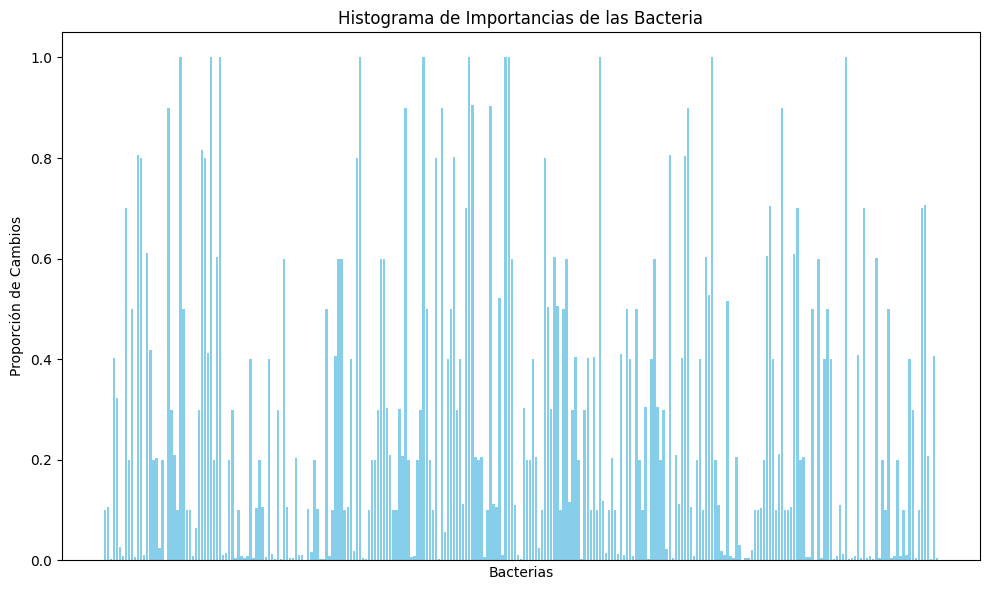

In [ ]:
import matplotlib.pyplot as plt

# Filtrar solo las importancias mayores que 0
importancias_mayores_que_cero = df_promedio[df_promedio['Conteo'] > 0]

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.bar(importancias_mayores_que_cero['Característica'], importancias_mayores_que_cero['Conteo'], color='skyblue')
plt.xlabel('Bacterias')
plt.ylabel('Proporción de Cambios')
plt.title('Histograma de Importancias de las Bacteria')
plt.xticks([], [])  # Esto elimina las etiquetas del eje x
plt.tight_layout()
plt.show()

In [ ]:
# Filtrar las características con importancia igual a 1
bacterias_importancia_1 = df_promedio[df_promedio['Conteo'] == 1]

# Contar cuántas bacterias tienen importancia igual a 1
num_bacterias_importancia_1 = len(bacterias_importancia_1)

print(f"Número de bacterias con importancia igual a 1: {num_bacterias_importancia_1}")

Número de bacterias con importancia igual a 1: 11


In [ ]:
bacterias_importancia_1

,Característica,Conteo
37,g__Anaerostipes,1.0
58,g__Bifidobacterium_388775,1.0
61,g__Blautia_A_141781,1.0
151,g__Collinsella,1.0
177,g__Eggerthella,1.0
204,g__Faecalibacillus,1.0
232,g__Gemella,1.0
233,g__Gemmiger_A_73129,1.0
289,g__Mediterraneibacter_A_155507,1.0
351,g__Phocaeicola_A_858004,1.0


In [ ]:
# Definir los límites de los intervalos de longitud 0.1 en el rango [0, 1]
bins = [i / 10 for i in range(11)]

# Crear una nueva columna en el DataFrame que asigne cada bacteria a un intervalo basado en 'Conteo', incluyendo el límite inferior
df_promedio['Intervalo'] = pd.cut(df_promedio['Conteo'], bins, right=False)

# Contar cuántas bacterias caen en cada intervalo
conteo_por_intervalo = df_promedio['Intervalo'].value_counts().sort_index()

# Mostrar el resultado
conteo_por_intervalo

,Intervalo
"[0.0, 0.1)",304
"[0.1, 0.2)",47
"[0.2, 0.3)",38
"[0.3, 0.4)",18
"[0.4, 0.5)",24
"[0.5, 0.6)",16
"[0.6, 0.7)",16
"[0.7, 0.8)",7
"[0.8, 0.9)",10
"[0.9, 1.0)",7


In [ ]:
# Paso 1: Filtrar las bacterias con importancia igual a 1
bacterias_importancia_1 = df_promedio[df_promedio['Conteo'] == 1]['Característica'].values

# Lista de DataFrames de contrafactuales y query_instances
contrafactuales = [df_top_100_mejores_1, df_top_100_mejores_2, df_top_100_mejores_3, df_top_100_mejores_4,
                   df_top_100_mejores_5, df_top_100_mejores_6, df_top_100_mejores_7, df_top_100_mejores_8,
                   df_top_100_mejores_9, df_top_100_mejores_10]

query_instances = [query_instance, query_instance2, query_instance3, query_instance4, query_instance5,
                   query_instance6, query_instance7, query_instance8, query_instance9, query_instance10]

# Crear un DataFrame para almacenar la suma de cambios para cada bacteria
cambio_total_bacterias = pd.DataFrame(0, index=bacterias_importancia_1, columns=['Cambio Total'])

# Paso 2: Calcular el cambio total para cada bacteria
for contrafactual, query in zip(contrafactuales, query_instances):
    # Filtrar solo las bacterias con importancia igual a 1 en los contrafactuales y la instancia original
    valores_contrafactuales = contrafactual[bacterias_importancia_1]
    valores_originales = query[bacterias_importancia_1]

    # Calcular el cambio para cada bacteria (contrafactuales - original)
    cambio_bacterias = valores_contrafactuales.mean() - valores_originales.squeeze()

    # Sumar el cambio para cada bacteria
    cambio_total_bacterias['Cambio Total'] += cambio_bacterias

# Paso 3: Dividir el cambio total entre 1000 para obtener el cambio medio
cambio_total_bacterias['Cambio Medio'] = cambio_total_bacterias['Cambio Total'] / 1000

# Mostrar los resultados finales ordenados por el cambio medio
cambio_total_bacterias = cambio_total_bacterias.sort_values(by='Cambio Medio', ascending=False)

# Mostrar el DataFrame con los resultados
print(cambio_total_bacterias)

                                Cambio Total  Cambio Medio
g__Phocaeicola_A_858004             0.104780      0.000105
g__Eggerthella                     -0.016708     -0.000017
g__Streptococcus                   -0.046631     -0.000047
g__Gemella                         -0.060010     -0.000060
g__Faecalibacillus                 -0.114712     -0.000115
g__Mediterraneibacter_A_155507     -0.162918     -0.000163
g__Bifidobacterium_388775          -0.197767     -0.000198
g__Anaerostipes                    -0.230824     -0.000231
g__Gemmiger_A_73129                -0.300950     -0.000301
g__Collinsella                     -0.462794     -0.000463
g__Blautia_A_141781                -1.726125     -0.001726


In [ ]:
# Paso 1: Filtrar las bacterias con importancia igual a 1
bacterias_importancia_1 = df_promedio[df_promedio['Conteo'] == 1]['Característica'].values

# Lista de DataFrames de contrafactuales y query_instances
contrafactuales = [df_top_100_mejores_1, df_top_100_mejores_2, df_top_100_mejores_3, df_top_100_mejores_4,
                   df_top_100_mejores_5, df_top_100_mejores_6, df_top_100_mejores_7, df_top_100_mejores_8,
                   df_top_100_mejores_9, df_top_100_mejores_10]

query_instances = [query_instance, query_instance2, query_instance3, query_instance4, query_instance5,
                   query_instance6, query_instance7, query_instance8, query_instance9, query_instance10]

# Crear un DataFrame para almacenar los resultados por bacteria
resultados_bacterias = pd.DataFrame(0, index=bacterias_importancia_1,
                                    columns=['Cambio Total Aumenta', 'Veces Aumenta',
                                             'Cambio Total Disminuye', 'Veces Disminuye'])

# Paso 2: Iterar por cada contrafactual para cada instancia original
for contrafactual, query in zip(contrafactuales, query_instances):
    # Iterar por cada contrafactual (cada fila del DataFrame contrafactual)
    for _, fila_contrafactual in contrafactual.iterrows():
        # Filtrar solo las bacterias con importancia igual a 1 en los contrafactuales y la instancia original
        valores_contrafactuales = fila_contrafactual[bacterias_importancia_1]
        valores_originales = query[bacterias_importancia_1].squeeze()

        # Calcular el cambio para cada bacteria (contrafactual - original)
        cambio_bacterias = valores_contrafactuales - valores_originales

        # Registrar los casos en los que aumenta
        aumentos = cambio_bacterias[cambio_bacterias > 0]
        resultados_bacterias.loc[aumentos.index, 'Cambio Total Aumenta'] += aumentos
        resultados_bacterias.loc[aumentos.index, 'Veces Aumenta'] += 1

        # Registrar los casos en los que disminuye
        disminuciones = cambio_bacterias[cambio_bacterias < 0]
        resultados_bacterias.loc[disminuciones.index, 'Cambio Total Disminuye'] += disminuciones
        resultados_bacterias.loc[disminuciones.index, 'Veces Disminuye'] += 1

# Paso 3: Calcular el cambio medio para aumentos y disminuciones
resultados_bacterias['Cambio Medio Aumenta'] = resultados_bacterias['Cambio Total Aumenta'] / resultados_bacterias['Veces Aumenta']
resultados_bacterias['Cambio Medio Disminuye'] = -resultados_bacterias['Cambio Total Disminuye'] / resultados_bacterias['Veces Disminuye']

# Reemplazar los valores NaN por 0 donde no haya habido aumentos o disminuciones
resultados_bacterias.fillna(0, inplace=True)

# Mostrar los resultados finales
resultados_bacterias.drop(columns=['Cambio Total Aumenta','Cambio Total Disminuye'])

,Veces Aumenta,Veces Disminuye,Cambio Medio Aumenta,Cambio Medio Disminuye
g__Anaerostipes,21,979,0.074593,0.025178
g__Bifidobacterium_388775,36,964,0.157970,0.026415
g__Blautia_A_141781,58,942,0.093944,0.189025
g__Collinsella,14,986,0.076008,0.048016
g__Eggerthella,8,992,0.099326,0.002485
g__Faecalibacillus,30,970,0.118763,0.015499
g__Gemella,16,984,0.218623,0.009653
g__Gemmiger_A_73129,35,965,0.181161,0.037757
g__Mediterraneibacter_A_155507,16,984,0.103921,0.018246
g__Phocaeicola_A_858004,263,737,0.183755,0.051356
